<h5 style="color:maroon; text-align: center; font-size:25px;">Battery Life Prediction </h5>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
import warnings
import re 

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Reading the Dataset

In [29]:
Data = pd.read_csv("Final_Data.csv")

In [30]:
Data

,Uid,OEM,Device Name,RAM,Screen Size,OS,Battery Life (in mins),Battery Size,GPU TDP,Touch,Screen Resolution,Tech,Refresh Rate,sRGB Coverage,Brightness,CPU Brand,CPU GEN,Proc Line,GPU Brand,Chassis/Segments,Storage Size,Storage type,Thickness(in mm),CPU TDP
0,15720495464205000704_4298,HP,HP Chromebook 14-db (US),4,14.0,Chrome OS,855,47,0,No,1366 x 768,TN,60,60,220,A4,Unknown,Unknown,Unknown,Entry,32,EMMC,18,6
1,16312938826368999424_4527,HP,HP Chromebook 11A G8 EE (US),4,11.6,Chrome OS,900,47,0,No,1366 x 768,TN,60,60,220,A4,Unknown,Unknown,Unknown,Entry,32,EMMC,19,6
2,11344687060579999744_4946,HP,HP Stream 11-ak00 (US),4,11.6,Windows 10,720,37,0,No,1366 x 768,TN,60,60,220,ICP,Unknown,N,iGFX,Entry,32,EMMC,17,6
3,17329377882027999232_4744,HP,HP Chromebook 14at-na0 (US),4,14.0,Chrome OS,695,47,0,No,1920 x 1080,IPS,60,60,250,ICP,Unknown,N,iGFX,Entry,64,EMMC,18,6
4,15536322827025999872_4268,HP,HP Stream 14-cb0 (US),4,14.0,Windows 10,745,41,0,No,1366 x 768,TN,60,60,0,ICP,Unknown,N,iGFX,Entry,32,EMMC,18,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,453090,HP,HP Pavilion x360 15-dq0065cl (Pavilion x360 15...,12,15.6,Windows 10,256,41,0,Yes,1366 x 768,TN,60,58,196,Ci7,8th Gen,U,iGFX,Mainstream_Upper,512,SSD,20,15
1853,453194,MSI,MSI Alpha 15 A3DDK-034 (Alpha 15 Series),16,15.6,Windows 10,244,51,65,No,1920 x 1080,IPS,60,91,310,R7,3000,H,RX 5500M,Gaming_Musclebook,512,SSD,27,35
1854,452953,HP,HP 15s-fq1556ng (15s-fq Series),16,15.6,Windows 10,357,41,0,Yes,1920 x 1080,IPS,60,56,254,Ci5,10th Gen,U,iGFX,Mainstream_Lower,512,SSD,18,15
1855,452940,Apple,Apple MacBook Pro 13 2019 2TB3 (MacBook Pro 13...,8,13.3,Mac OS,777,58,0,No,2560 x 1600,IPS,60,99,603,Ci5,8th Gen,U,iGFX,Creation_Lower,256,SSD,14,15


In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Uid                     1857 non-null   object 
 1   OEM                     1857 non-null   object 
 2   Device Name             1857 non-null   object 
 3   RAM                     1857 non-null   int64  
 4   Screen Size             1857 non-null   float64
 5   OS                      1857 non-null   object 
 6   Battery Life (in mins)  1857 non-null   int64  
 7   Battery Size            1857 non-null   int64  
 8   GPU TDP                 1857 non-null   int64  
 9   Touch                   1857 non-null   object 
 10  Screen Resolution       1857 non-null   object 
 11  Tech                    1857 non-null   object 
 12  Refresh Rate            1857 non-null   int64  
 13  sRGB Coverage           1857 non-null   int64  
 14  Brightness              1857 non-null   

# Encoding the Categorical Variable

In [32]:
Data["OEM"].unique()

array(['HP ', 'Lenovo ', 'Dell ', 'Apple ', 'Acer ', 'Asus ', 'ASUS ',
       'Samsung ', 'Fujitsu ', 'MSI ', 'Microsoft ', 'Huawei ', 'Razer ',
       'LG ', 'Acer', 'Honor ', 'Dynabook ', 'LG'], dtype=object)

In [33]:
Data["OS"].unique()

array(['Chrome OS', 'Windows 10', 'Windows 11', 'Mac OS'], dtype=object)

In [34]:
os_mapping = {'Mac OS': 1, 'Chrome OS': 2, 'Windows 10': 3, 'Windows 11':4 }
Data['OS_encoded'] = Data['OS'].map(os_mapping)

In [35]:
touch_mapping =  {'No':1,'Yes':2}
Data['Touch_encoded'] = Data['Touch'].map(touch_mapping)

In [36]:
Data["Screen Resolution"].unique()

array(['1366 x 768', '1920 x 1080', '1366 x 912', '1600 x 900',
       '1920 x 1200', '2560 x 1440', '2560 x 1600', '3840 x 2400',
       '3072 x 1920', '1920 x 1280', '3000 x 2000', '3840 x 2160',
       '2240 x 1400', '2160 x 1350', '2256 x 1504', '2880 x 1800',
       '2048 x 1536', '3456 x 2160', '2560 x 1664', '3024 x 1964',
       '3456 x 2234', '3200 x 2000', '2160 x 1440', '3300 x 2200',
       '2880 x 1620', '2400 x 1600', '2496 x 1664', '3240 x 2160',
       '2944 x 1840', '1536 x 1024', '1900 x 1200', '2880 x 1600',
       '3120 x 2080', '2880 x 1864', '2560 x 1680', '2560 x 1920',
       '3072 x 1440', '2520 x 1680'], dtype=object)

In [37]:
resolution_mapping = {"1536 x 1024": 1, "1366 x 768": 2, "1366 x 912": 3, "1600 x 900": 4, "1900 x 1200": 5, "1920 x 1080": 6, "1920 x 1200": 7, "1920 x 1280": 8, "2160 x 1350": 9, "2160 x 1440": 10, "2240 x 1400": 11, "2256 x 1504": 12, "2400 x 1600": 13, "2496 x 1664": 14, "2520 x 1680": 15, "2560 x 1440": 16, "2560 x 1600": 17, "2560 x 1664": 18, "2560 x 1680": 19, "2560 x 1920": 20, "2880 x 1600": 21, "2880 x 1620": 22, "2880 x 1800": 23, "2880 x 1864": 24, "2944 x 1840": 25, "3000 x 2000": 26, "3024 x 1964": 27, "3072 x 1440": 28, "3072 x 1920": 29, "3120 x 2080": 30, "3200 x 2000": 31, "3240 x 2160": 32, "3300 x 2200": 33, "3456 x 2160": 34, "3456 x 2234": 35, "3840 x 2160": 36, "3840 x 2400": 37}
Data["Resolution_encoded"] = Data["Screen Resolution"].map(resolution_mapping)

In [38]:
Data["Tech"].unique()

array(['TN', 'IPS', 'OLED', 'Mini-LED', 'AMOLED'], dtype=object)

In [89]:
tech_mapping = {'AMOLED' : 5,'Mini-LED': 4, 'OLED': 3, 'IPS': 2, 'TN': 1}
Data["Tech_encoded"] = Data["Tech"].map(tech_mapping)

In [40]:
Data["Proc Line"].unique()

array(['Unknown', 'N', 'U', 'H', 'HX', 'P', 'HS', 'HK', 'M1', 'M2', 'M3',
       'M3 PRO', 'M3 MAX', 'M2 PRO', 'M2 MAX', 'M1 MAX', 'M1 PRO'],
      dtype=object)

In [41]:
proc_line_mapping = {'M1':1,'M2': 2,'M1 PRO': 3, 'M2 PRO':4 , 'M1 Max': 5, 'M2 Max': 6, 'M3': 7, 'M3 PRO' : 8, 'M3 MAX':9, 'Unknown':10, 'U': 11, 'N': 12,'P' :13, 'H' : 14, 'HS' : 15, 'HX' : 16, 'HK' : 17}
Data["Proc_line_encoded"] = Data["Proc Line"].map(proc_line_mappingmapping)

In [48]:
Data['GPU Brand'].value_counts()

iGFX              604
Vega              160
RTX 3050          117
RTX 3070          109
RTX 3060          103
                 ... 
Apple M2 PRO        1
GEF MX550           1
APPLE M1            1
RTX 3000 (Ada)      1
RTX 2000            1
Name: GPU Brand, Length: 76, dtype: int64

In [43]:
Data["CPU Series"] = Data["CPU Brand"] + ' ' + Data["CPU GEN"]

In [44]:
Data["CPU Series"].value_counts()

Ci7 12th Gen    237
Ci7 11th Gen    207
Ci7 10th Gen    166
Ci7 13th Gen    136
Ci5 11th Gen    121
               ... 
Ci5 9th Gen       1
M1 Unknown        1
Ci5 N Gen         1
Ci3 8th Gen       1
Ci9 9th Gen       1
Name: CPU Series, Length: 63, dtype: int64

In [45]:
#Data.to_csv("Final_data_encoding.csv")

In [50]:
Data = pd.read_csv("Final_data_encoding.csv")

In [53]:
gpu_tdp_modes = Data.groupby('GPU Brand')['GPU TDP'].apply(lambda x: x.mode().iloc[0])

# Create a ranking dictionary based on the mode of TDP
GPU_brand_mapping = {brand: rank+ 1 for rank, (brand, _) in enumerate(gpu_tdp_modes.sort_values(ascending=True).iteritems())}

# Display the mapping table and ranking dictionary
print("Mapping Table:")
print(gpu_tdp_modes)
print("\nRanking Dictionary:")
print(GPU_brand_mapping)

Mapping Table:
GPU Brand
 RTX 3000 (Ada)    90
APPLE M1           10
APPLE M2            0
APPLE M2 MAX       64
APPLE M3           15
                   ..
T550               20
T600               40
Unknown             0
Vega                0
iGFX                0
Name: GPU TDP, Length: 76, dtype: int64

Ranking Dictionary:
{'iGFX': 1, 'APPLE M2': 2, 'Radeon 610M': 3, 'Vega': 4, 'Unknown': 5, 'GEF MX110': 6, 'Apple M2': 7, 'APPLE M1': 8, 'Apple M1': 9, 'GEF MX350': 10, 'Apple M1 PRO': 11, 'APPLE M3': 12, 'T1200': 13, 'T500': 14, 'Quadro P520': 15, 'GEF MX230': 16, 'T550': 17, 'APPLE M3 PRO': 18, 'Apple M2 PRO': 19, 'GEF MX250': 20, 'GEF MX330': 21, 'GEF MX450': 22, 'GEF MX550': 23, 'Arc A370M': 24, 'APPLE M3 Max': 25, 'Arc A350M': 26, 'APPLE M3 Pro': 27, 'RTX A500': 28, 'Apple M1 MAX': 29, 'GTX 1050': 30, 'Quadro T1000': 31, 'T600': 32, 'Radeon 660M': 33, 'Radeon 680M': 34, 'Quadro T2000': 35, 'RTX 3000 (Ada)': 36, 'Radeon 780M': 37, 'GTX 1650': 38, 'Quadro RTX 3000': 39, 'RTX 2050':

In [54]:
Data["GPU_brand_encoded"] = Data["GPU Brand"].map(GPU_brand_mapping)

In [55]:
cpu_tdp_modes = Data.groupby('CPU Series')['CPU TDP'].apply(lambda x: x.mode().iloc[0])

# Create a ranking dictionary based on the mode of TDP
CPU_series_mapping = {brand: rank+ 1 for rank, (brand, _) in enumerate(cpu_tdp_modes.sort_values(ascending=True).iteritems())}

# Display the mapping table and ranking dictionary
print("Mapping Table:")
print(cpu_tdp_modes)
print("\nRanking Dictionary:")
print(CPU_series_mapping)

Mapping Table:
CPU Series
3015e Unknown           6
A4 Unknown              6
A6 Unknown              6
ATH Unknown            15
Ci3 10th Gen           15
Ci3 11th Gen           28
Ci3 12th Gen           55
Ci3 13th Gen           55
Ci3 8th Gen            15
Ci3 N Gen              15
Ci5 10th Gen           15
Ci5 11th Gen           35
Ci5 12th Gen           55
Ci5 13th Gen           55
Ci5 8th Gen            15
Ci5 9th Gen            45
Ci5 Unknown             7
Ci7 10th Gen           45
Ci7 11th Gen           45
Ci7 12th Gen           45
Ci7 13th Gen           45
Ci7 8th Gen            15
Ci7 9th Gen            45
Ci9 10th Gen           45
Ci9 11th Gen           45
Ci9 12th Gen          115
Ci9 13th Gen           55
Ci9 9th Gen            45
ICP Unknown             6
IPP Unknown             6
M1                     10
M1 MAX                 30
M1 PRO                 22
M2                      9
M2 MAX                 79
M2 PRO                 27
M3 MAX                 53
M3 PRO      

In [56]:
Data["CPU_series_encoded"] = Data["CPU Series"].map(CPU_series_mapping)

In [58]:
Data["Storage type"].unique()

array(['EMMC', 'SSD', 'HDD', 'Unknown'], dtype=object)

In [59]:
storage_type_mapping =  {'EMMC':1,'Unknown':2,'SSD':3,'HDD':4}
Data["Storage_type_encoded"] = Data["Storage type"].map(storage_type_mapping)

In [60]:
Data

,Unnamed: 0,Uid,OEM,Device Name,RAM,Screen Size,OS,Battery Life (in mins),Battery Size,GPU TDP,Touch,Screen Resolution,Tech,Refresh Rate,sRGB Coverage,Brightness,CPU Brand,CPU GEN,Proc Line,GPU Brand,Chassis/Segments,Storage Size,Storage type,Thickness(in mm),CPU TDP,OS_encoded,Touch_encoded,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU Series,GPU_brand_encoded,CPU_series_encoded,Storage_type_encoded
0,0,15720495464205000704_4298,HP,HP Chromebook 14-db (US),4,14.0,Chrome OS,855,47,0,No,1366 x 768,TN,60,60,220,A4,Unknown,Unknown,Unknown,Entry,32,EMMC,18,6,2,1,2,5,10,A4 Unknown,5,6,1
1,1,16312938826368999424_4527,HP,HP Chromebook 11A G8 EE (US),4,11.6,Chrome OS,900,47,0,No,1366 x 768,TN,60,60,220,A4,Unknown,Unknown,Unknown,Entry,32,EMMC,19,6,2,1,2,5,10,A4 Unknown,5,6,1
2,2,11344687060579999744_4946,HP,HP Stream 11-ak00 (US),4,11.6,Windows 10,720,37,0,No,1366 x 768,TN,60,60,220,ICP,Unknown,N,iGFX,Entry,32,EMMC,17,6,3,1,2,5,12,ICP Unknown,1,4,1
3,3,17329377882027999232_4744,HP,HP Chromebook 14at-na0 (US),4,14.0,Chrome OS,695,47,0,No,1920 x 1080,IPS,60,60,250,ICP,Unknown,N,iGFX,Entry,64,EMMC,18,6,2,1,6,4,12,ICP Unknown,1,4,1
4,4,15536322827025999872_4268,HP,HP Stream 14-cb0 (US),4,14.0,Windows 10,745,41,0,No,1366 x 768,TN,60,60,0,ICP,Unknown,N,iGFX,Entry,32,EMMC,18,6,3,1,2,5,12,ICP Unknown,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,1852,453090,HP,HP Pavilion x360 15-dq0065cl (Pavilion x360 15...,12,15.6,Windows 10,256,41,0,Yes,1366 x 768,TN,60,58,196,Ci7,8th Gen,U,iGFX,Mainstream_Upper,512,SSD,20,15,3,2,2,5,11,Ci7 8th Gen,1,13,3
1852,1853,453194,MSI,MSI Alpha 15 A3DDK-034 (Alpha 15 Series),16,15.6,Windows 10,244,51,65,No,1920 x 1080,IPS,60,91,310,R7,3000,H,RX 5500M,Gaming_Musclebook,512,SSD,27,35,3,1,6,4,14,R7 3000,52,32,3
1853,1854,452953,HP,HP 15s-fq1556ng (15s-fq Series),16,15.6,Windows 10,357,41,0,Yes,1920 x 1080,IPS,60,56,254,Ci5,10th Gen,U,iGFX,Mainstream_Lower,512,SSD,18,15,3,2,6,4,11,Ci5 10th Gen,1,20,3
1854,1855,452940,Apple,Apple MacBook Pro 13 2019 2TB3 (MacBook Pro 13...,8,13.3,Mac OS,777,58,0,No,2560 x 1600,IPS,60,99,603,Ci5,8th Gen,U,iGFX,Creation_Lower,256,SSD,14,15,1,1,17,4,11,Ci5 8th Gen,1,18,3


In [61]:
Data.to_csv("Final_Battery_Prediction_Dataset.csv")

In [62]:
columns_to_drop = ['Unnamed: 0','OEM']
Data = Data.drop(columns=columns_to_drop)
Data.columns

Index(['Uid', 'Device Name', 'RAM', 'Screen Size', 'OS',
       'Battery Life (in mins)', 'Battery Size', 'GPU TDP', 'Touch',
       'Screen Resolution', 'Tech', 'Refresh Rate', 'sRGB Coverage',
       'Brightness', 'CPU Brand', 'CPU GEN', 'Proc Line', 'GPU Brand',
       'Chassis/Segments', 'Storage Size', 'Storage type', 'Thickness(in mm)',
       'CPU TDP', 'OS_encoded', 'Touch_encoded', 'Resolution_encoded',
       'Tech_encoded', 'Proc_line_encoded', 'CPU Series', 'GPU_brand_encoded',
       'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

In [63]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Uid                     1856 non-null   object 
 1   Device Name             1856 non-null   object 
 2   RAM                     1856 non-null   int64  
 3   Screen Size             1856 non-null   float64
 4   OS                      1856 non-null   object 
 5   Battery Life (in mins)  1856 non-null   int64  
 6   Battery Size            1856 non-null   int64  
 7   GPU TDP                 1856 non-null   int64  
 8   Touch                   1856 non-null   object 
 9   Screen Resolution       1856 non-null   object 
 10  Tech                    1856 non-null   object 
 11  Refresh Rate            1856 non-null   int64  
 12  sRGB Coverage           1856 non-null   int64  
 13  Brightness              1856 non-null   int64  
 14  CPU Brand               1856 non-null   

<Axes: >

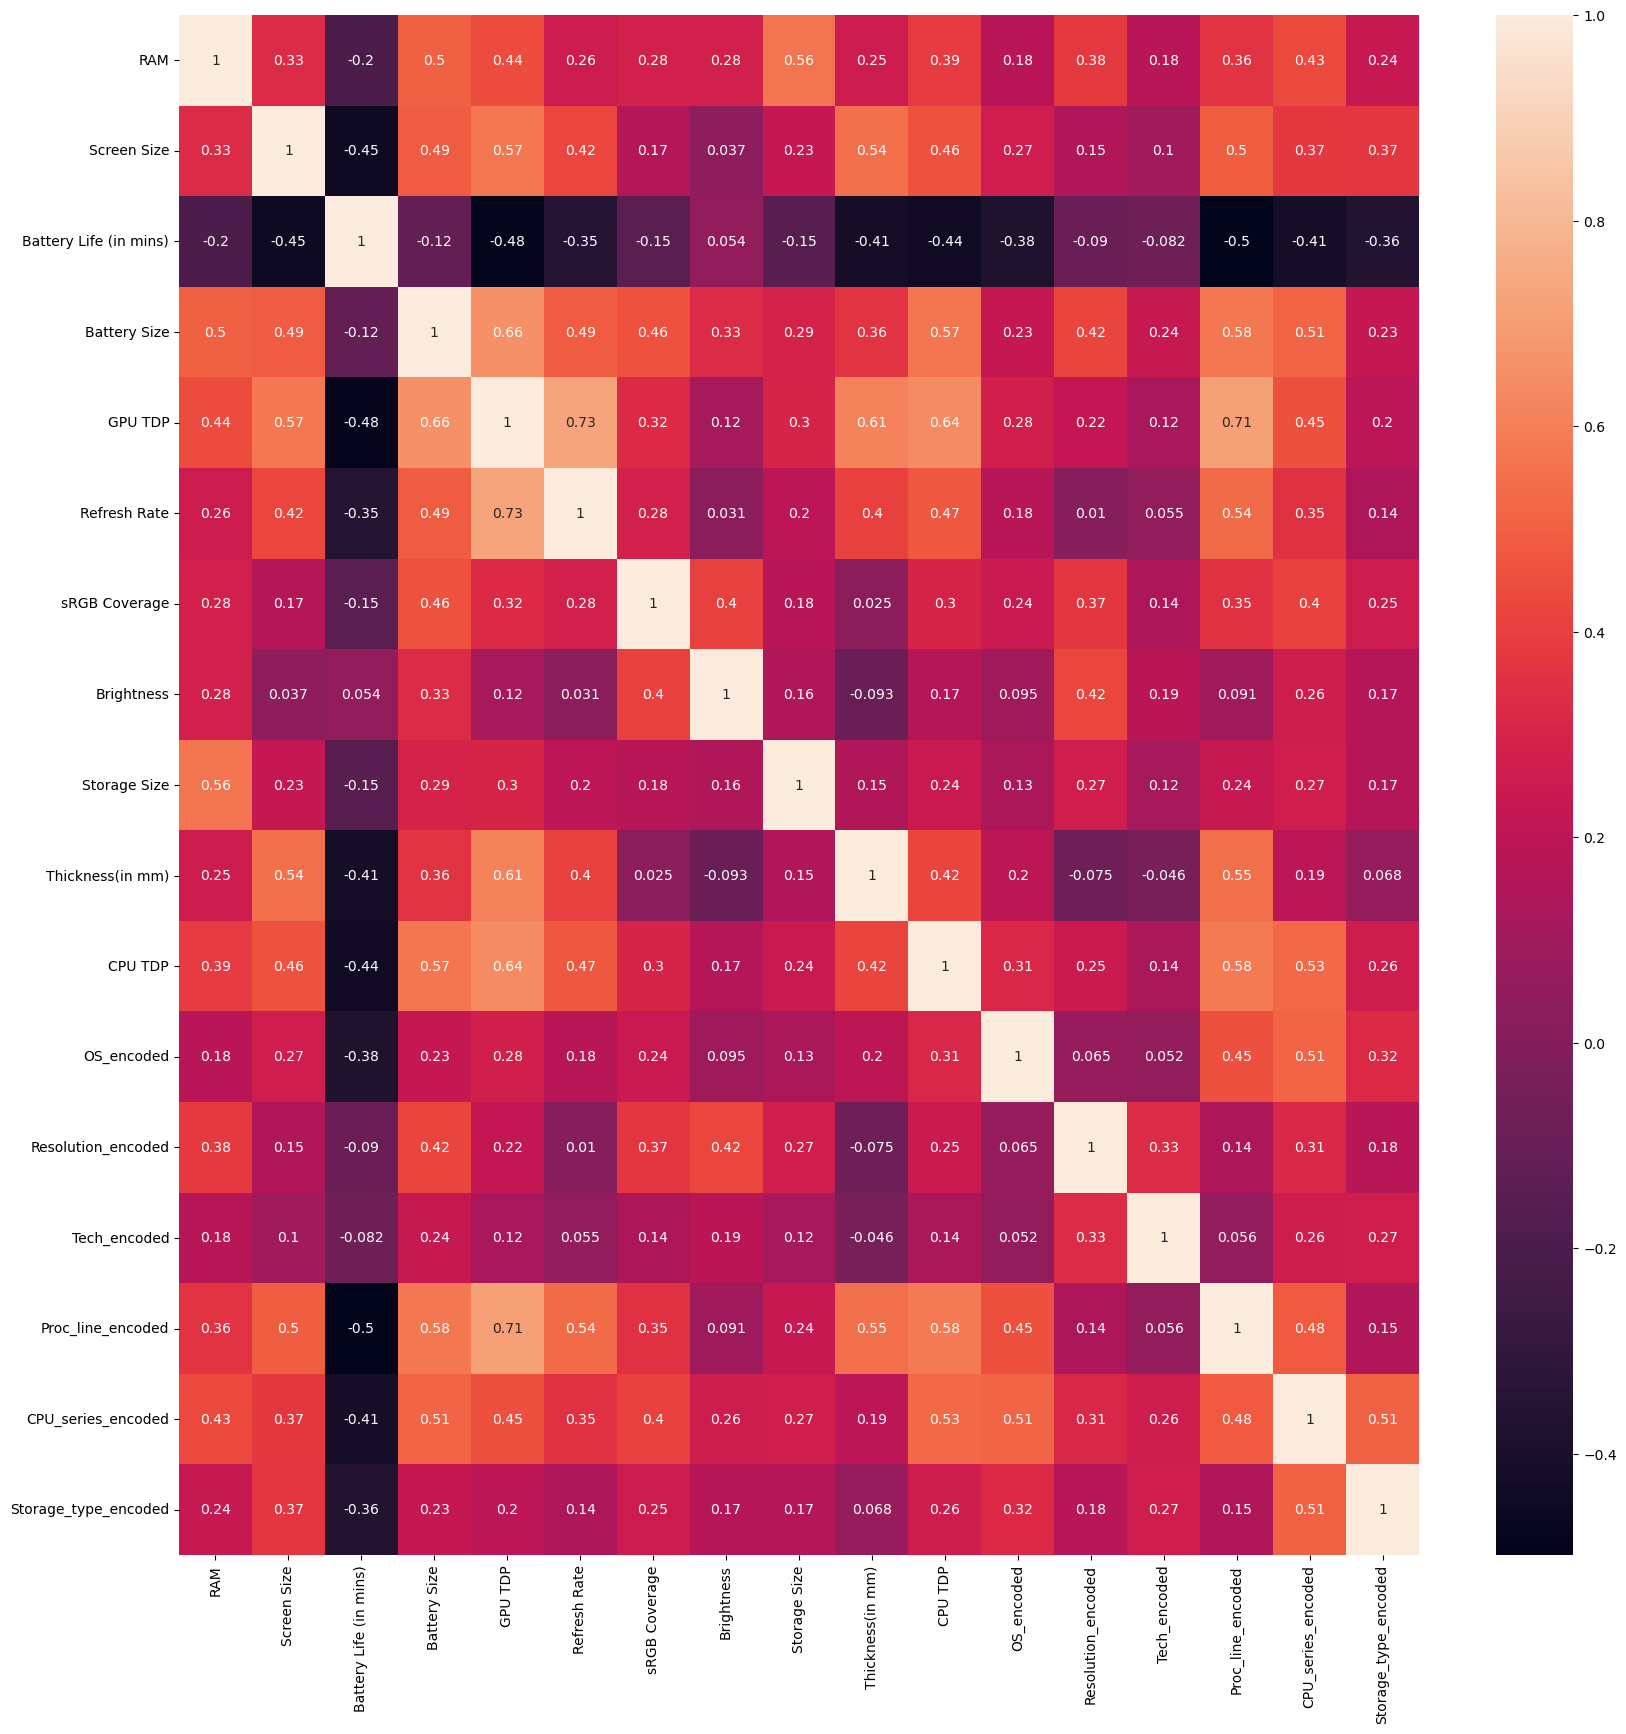

In [90]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot = True)

In [68]:
# Droping the GPU_brand_encoded column since it shows multicollinear with other columns 

In [69]:
columns_to_drop = ['GPU_brand_encoded']
Data = Data.drop(columns=columns_to_drop)
Data.columns

Index(['Uid', 'Device Name', 'RAM', 'Screen Size', 'OS',
       'Battery Life (in mins)', 'Battery Size', 'GPU TDP', 'Touch',
       'Screen Resolution', 'Tech', 'Refresh Rate', 'sRGB Coverage',
       'Brightness', 'CPU Brand', 'CPU GEN', 'Proc Line', 'GPU Brand',
       'Chassis/Segments', 'Storage Size', 'Storage type', 'Thickness(in mm)',
       'CPU TDP', 'OS_encoded', 'Touch_encoded', 'Resolution_encoded',
       'Tech_encoded', 'Proc_line_encoded', 'CPU Series', 'CPU_series_encoded',
       'Storage_type_encoded'],
      dtype='object')

<Axes: >

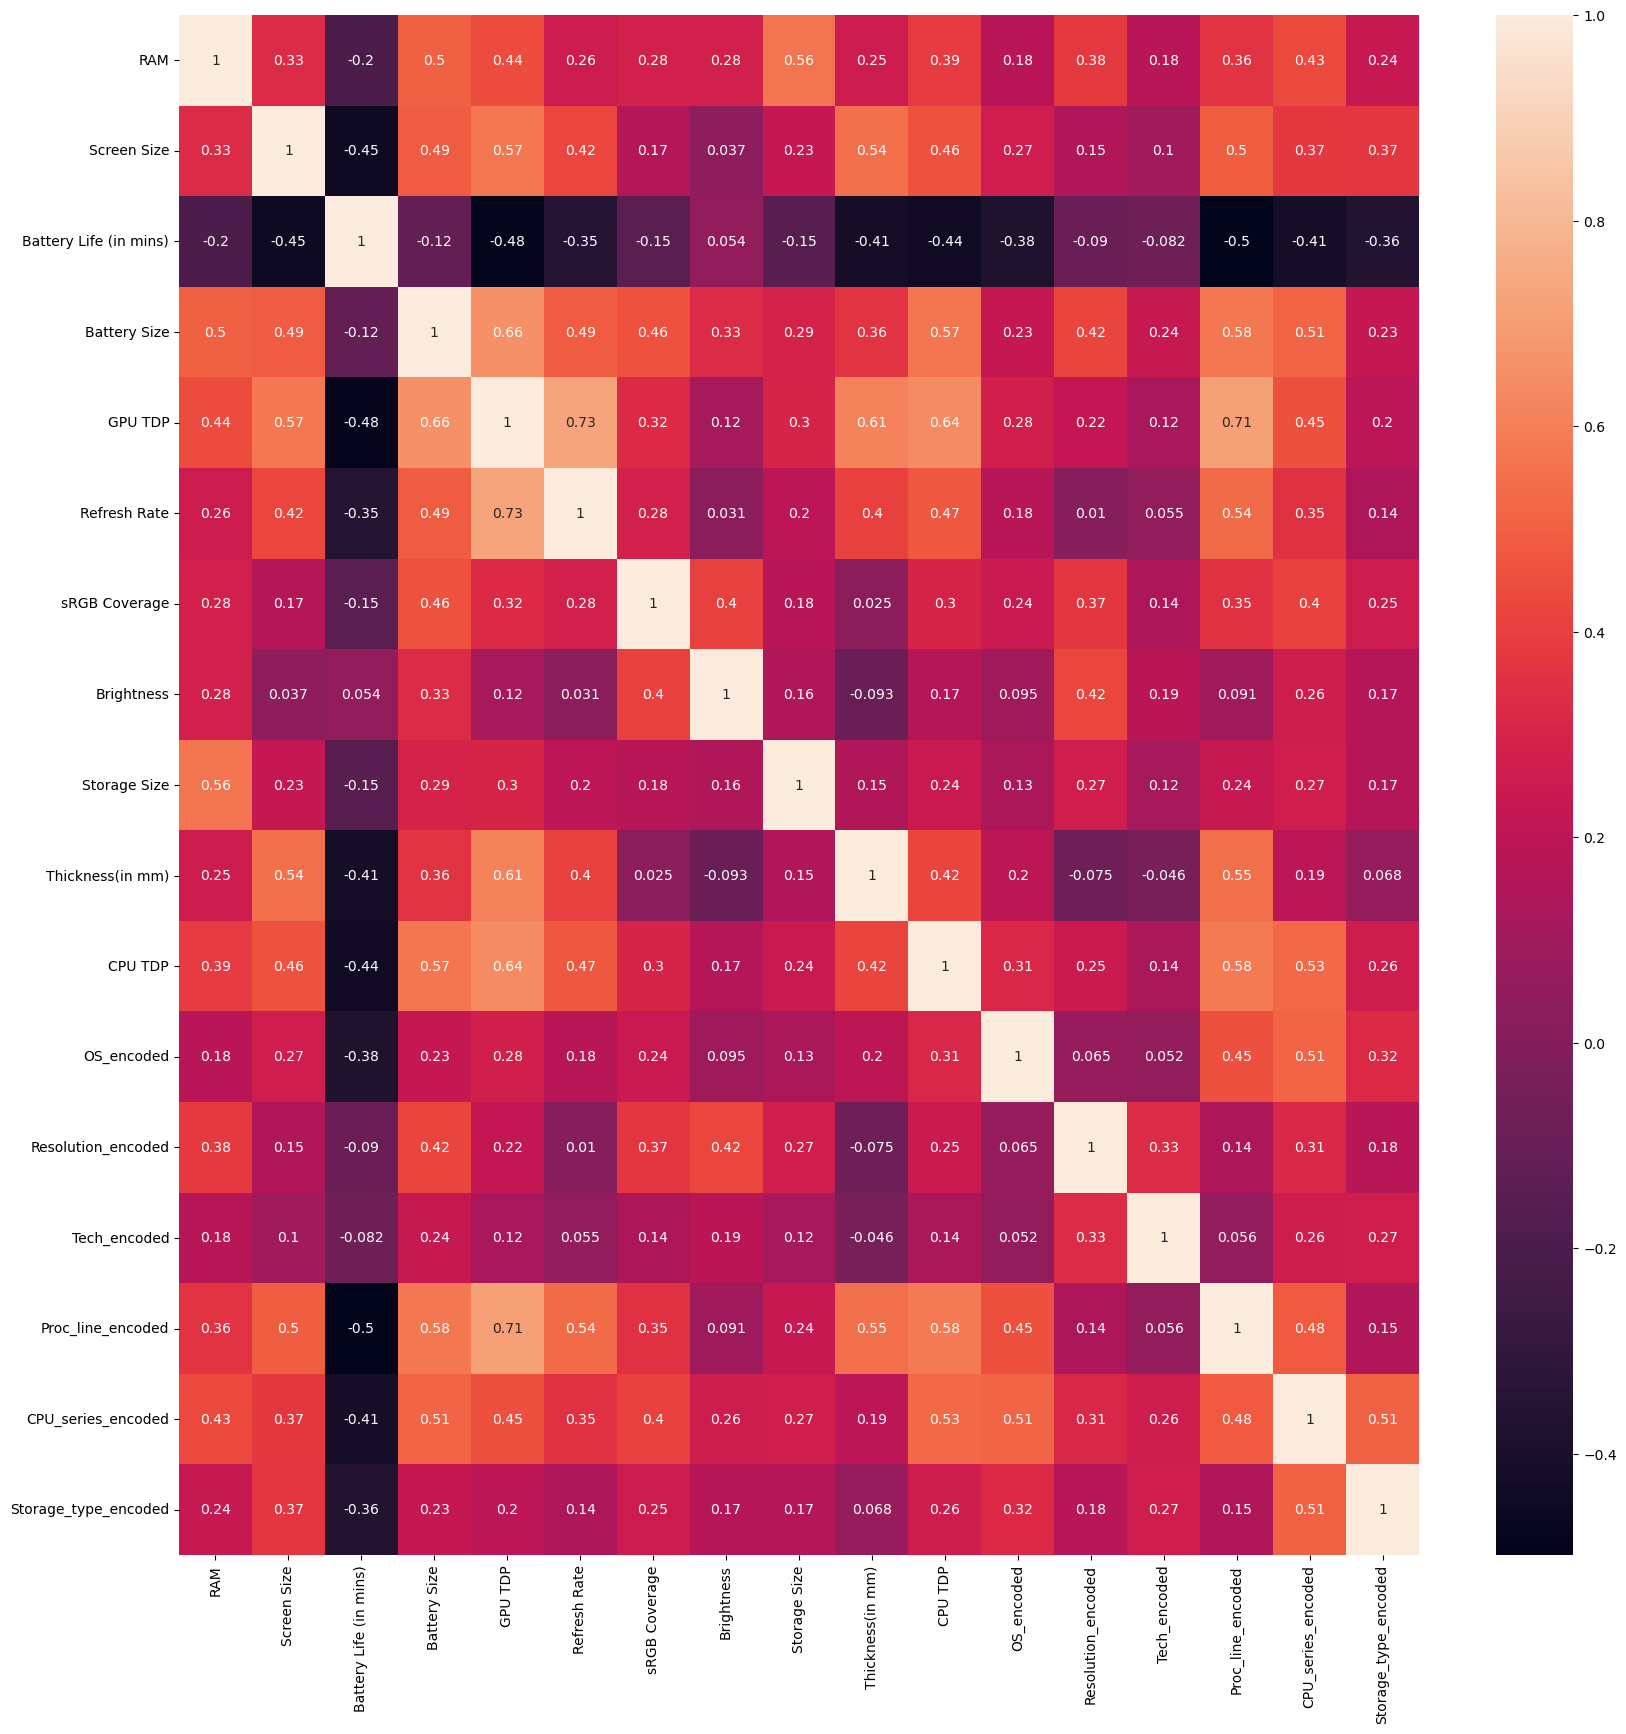

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot = True)

In [73]:
columns_to_drop = ['Uid','Device Name','OS','Touch','Screen Resolution','Tech','CPU Brand','CPU GEN','Proc Line','GPU Brand','Storage type','CPU Series','Chassis/Segments']
x = Data.drop(columns=columns_to_drop)
x.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Storage Size', 'Thickness(in mm)', 'CPU TDP', 'OS_encoded',
       'Touch_encoded', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

In [75]:
X_constant = sm.add_constant(x)

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]  #We can detect multicollinearity using the variance inflation factor (VIF).
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

# All the VIF are less than 5, so there is no multicollinear columns

,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Refresh Rate,sRGB Coverage,Brightness,Storage Size,Thickness(in mm),CPU TDP,OS_encoded,Touch_encoded,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU_series_encoded,Storage_type_encoded
vif,1.952066,2.068413,2.240985,3.436582,4.729112,2.387628,1.604138,1.433227,1.493239,2.20887,2.086874,1.601053,1.256341,1.802195,1.231795,2.983262,2.406005,1.730236


In [99]:
columns_to_drop = ['OS_encoded','Storage Size','OS']
Data = Data.drop(columns=columns_to_drop)
Data.columns

Index(['Uid', 'Device Name', 'RAM', 'Screen Size', 'Battery Life (in mins)',
       'Battery Size', 'GPU TDP', 'Touch', 'Screen Resolution', 'Tech',
       'Refresh Rate', 'sRGB Coverage', 'Brightness', 'CPU Brand', 'CPU GEN',
       'Proc Line', 'GPU Brand', 'Chassis/Segments', 'Storage type',
       'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU Series', 'CPU_series_encoded',
       'Storage_type_encoded'],
      dtype='object')

<Axes: >

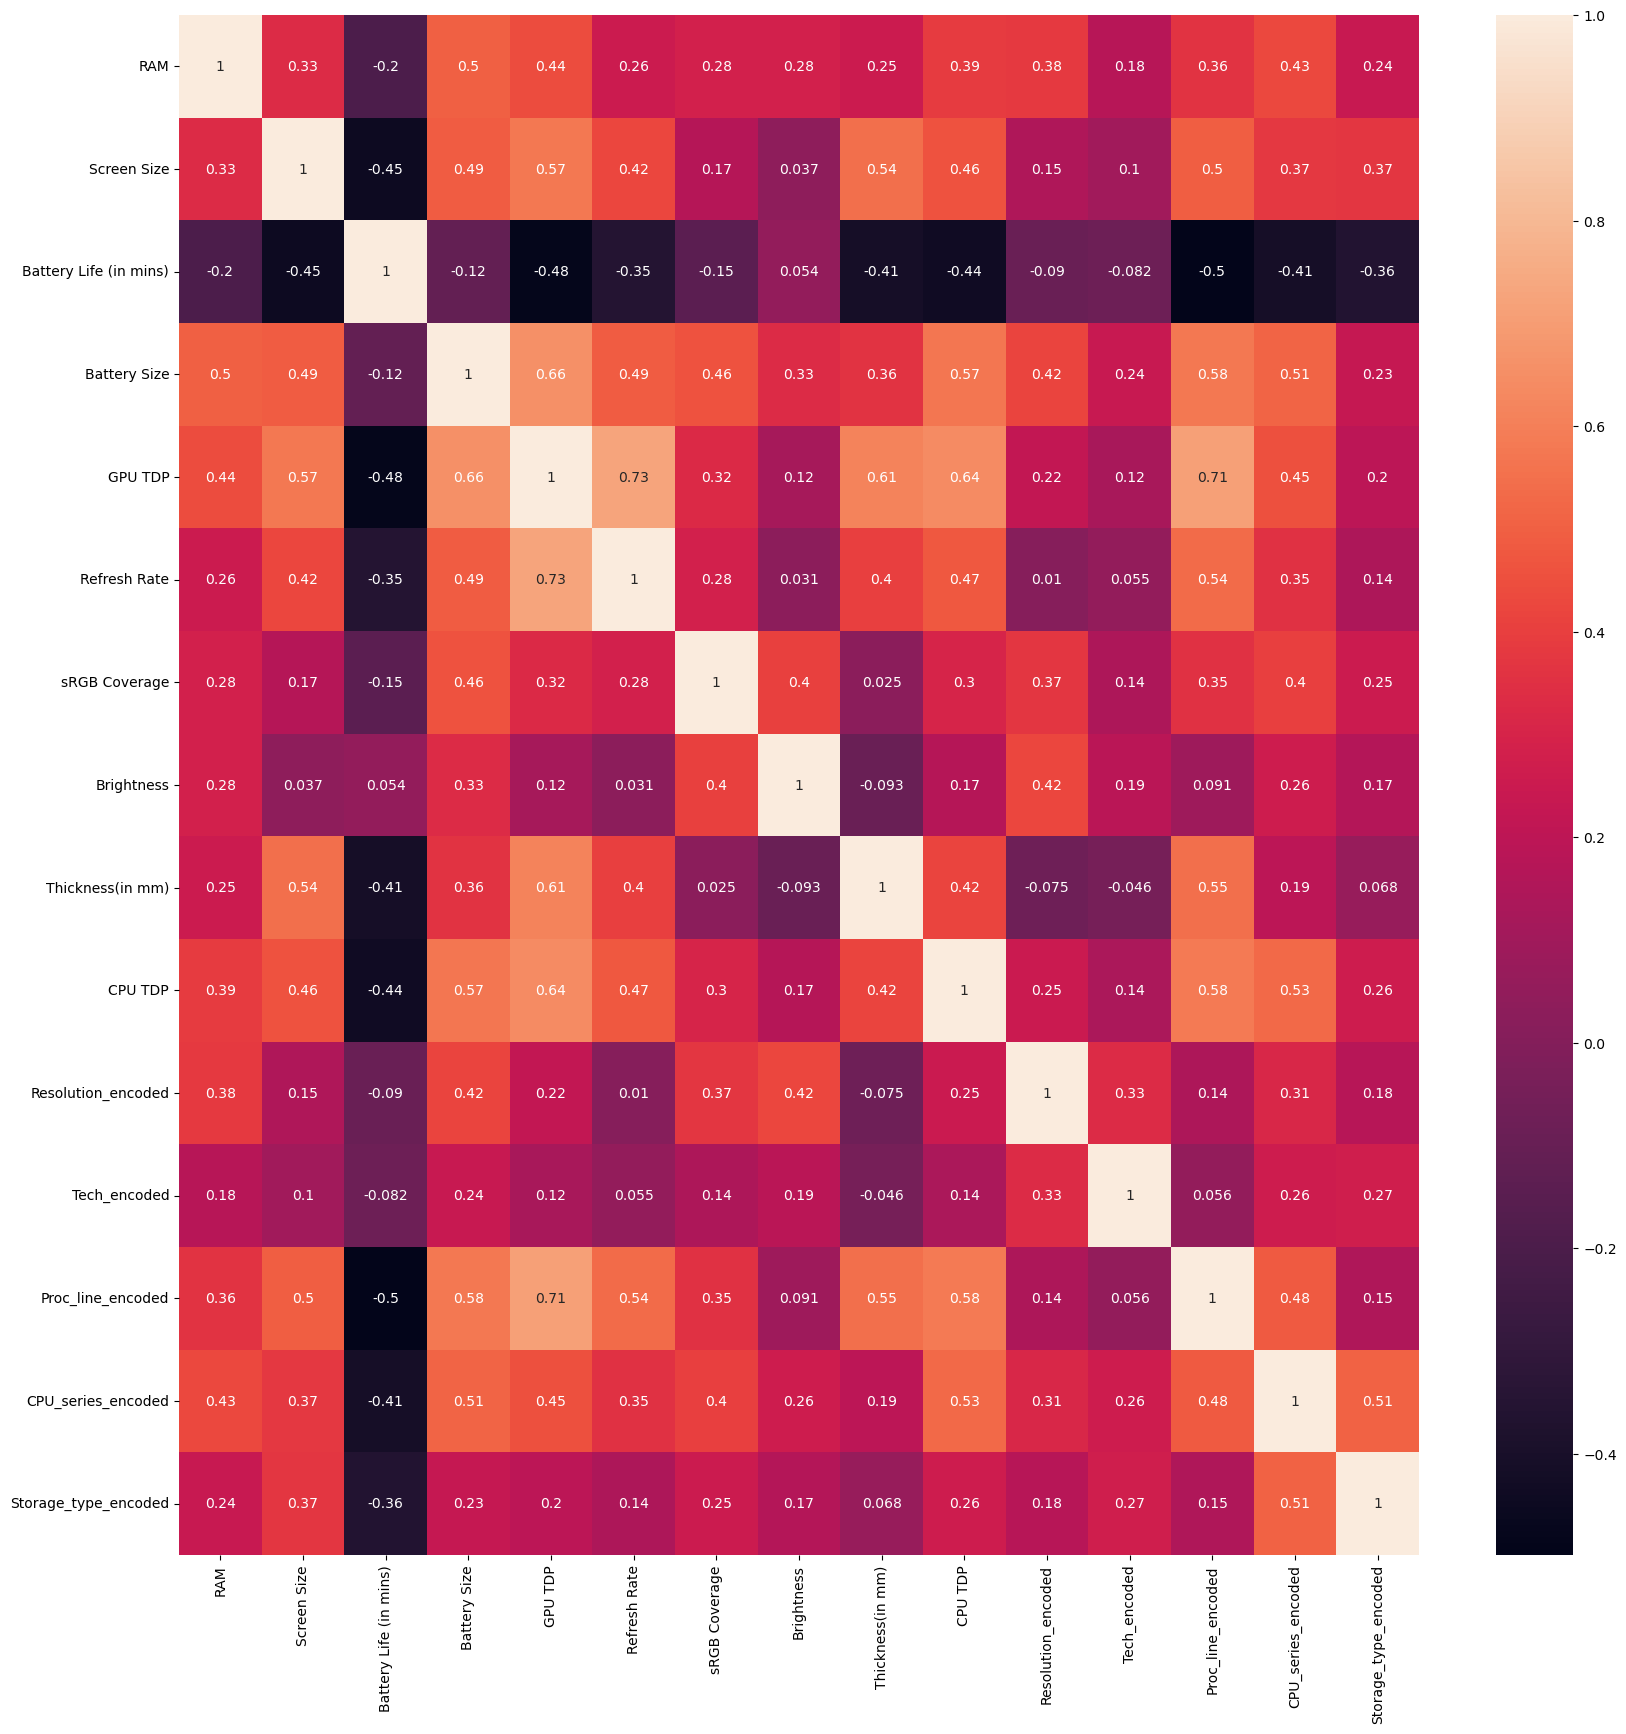

In [100]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot = True)

In [103]:
Creation = Data[(Data['Chassis/Segments'] == 'Creation_Lower') | (Data['Chassis/Segments'] == 'Creation_Upper')].copy()

In [104]:
Creation

,Uid,Device Name,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Touch,Screen Resolution,Tech,Refresh Rate,sRGB Coverage,Brightness,CPU Brand,CPU GEN,Proc Line,GPU Brand,Chassis/Segments,Storage type,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU Series,CPU_series_encoded,Storage_type_encoded
98,18165634564195000320_7086,HP Envy 16-h11 (US),32,16.0,217,83,90,Yes,2560 x 1600,IPS,120,100,300,Ci9,13th Gen,H,RTX 4060,Creation_Upper,SSD,20,45,17,2,14,Ci9 13th Gen,54,3
138,11002274326132000768_5496,Lenovo IdeaPad 5 Pro 16ACH (US),8,16.0,365,75,0,No,2560 x 1600,IPS,60,100,350,R5,5000,H,Vega,Creation_Lower,SSD,18,54,17,2,14,R5 5000,27,3
192,7564349878428711849_5497,Lenovo IdeaPad 5 Pro 16IHU (US),8,16.0,392,75,25,No,2560 x 1600,IPS,60,100,350,Ci5,11th Gen,H,GEF MX450,Creation_Lower,SSD,18,35,17,2,14,Ci5 11th Gen,34,3
193,1987221546629470988_5851,Lenovo IdeaPad 5 Pro 14ACN (US),16,14.0,420,56,0,Yes,2240 x 1400,IPS,60,100,300,R5,5000,U,Vega,Creation_Lower,SSD,18,25,11,2,11,R5 5000,27,3
253,13596964375374000128_5897,Lenovo IdeaPad Slim 7 Pro 14IHU (US),16,14.0,352,61,0,Yes,2880 x 1800,IPS,90,100,400,Ci7,11th Gen,H,iGFX,Creation_Upper,SSD,17,35,23,2,14,Ci7 11th Gen,41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,466868,Dell XPS 15 9500 Core i5 (XPS 15 9500 Series),8,15.6,556,56,0,No,1920 x 1200,IPS,60,100,592,Ci5,10th Gen,H,iGFX,Creation_Upper,SSD,18,45,7,2,14,Ci5 10th Gen,20,3
1815,464163,Asus ProArt StudioBook Pro 17 W700G3T (ProArt ...,32,17.0,352,57,60,No,1920 x 1200,IPS,60,99,323,Ci7,9th Gen,H,Quadro RTX 3000,Creation_Upper,SSD,18,45,7,2,14,Ci7 9th Gen,43,3
1825,459844,Acer ConceptD 5 CN517-71-74YA (ConceptD 5 Series),32,17.3,333,55,80,Yes,3840 x 2160,IPS,60,100,410,Ci7,9th Gen,H,RTX 2060,Creation_Upper,SSD,24,45,36,2,14,Ci7 9th Gen,43,3
1845,454123,Acer ConceptD 5 CN515-51-73Z7 (ConceptD 5 Series),16,15.6,274,48,0,No,3840 x 2160,IPS,60,100,350,Ci7,8th Gen,U,Vega,Creation_Upper,SSD,17,65,36,2,11,Ci7 8th Gen,13,3


In [105]:
Gaming = Data[(Data['Chassis/Segments'] == 'Entry_Gaming') | (Data['Chassis/Segments'] == 'Gaming_Musclebook')].copy()

In [106]:
Gaming

,Uid,Device Name,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Touch,Screen Resolution,Tech,Refresh Rate,sRGB Coverage,Brightness,CPU Brand,CPU GEN,Proc Line,GPU Brand,Chassis/Segments,Storage type,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU Series,CPU_series_encoded,Storage_type_encoded
23,18398549799291000832_6298,HP Victus 15t-fa0 (US),16,15.6,247,52,55,No,1920 x 1080,IPS,144,60,250,Ci5,12th Gen,H,GTX 1650,Entry_Gaming,SSD,24,45,6,2,14,Ci5 12th Gen,55,3
24,781228843556609459_6298,HP Victus 15t-fa0 (US),8,15.6,247,52,75,No,1920 x 1080,IPS,144,60,250,Ci5,12th Gen,H,RTX 3050,Entry_Gaming,SSD,24,45,6,2,14,Ci5 12th Gen,55,3
25,3583614495673024508_6298,HP Victus 15t-fa0 (US),8,15.6,247,52,75,No,1920 x 1080,IPS,144,60,250,Ci5,12th Gen,H,RTX 3050,Entry_Gaming,SSD,24,45,6,2,14,Ci5 12th Gen,55,3
26,2321163364352536694_6893,HP Victus 15t-fa10 (US),16,15.6,327,70,120,No,1920 x 1080,IPS,144,60,250,Ci7,13th Gen,H,RTX 4050,Entry_Gaming,SSD,24,45,6,2,14,Ci7 13th Gen,42,3
58,16699870350183999488_5639,HP Victus 16t-d0 (US),8,16.1,327,70,75,No,1920 x 1080,IPS,60,60,250,Ci5,11th Gen,H,RTX 3050,Entry_Gaming,SSD,24,45,6,2,14,Ci5 11th Gen,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,459155,Lenovo Legion Y740-17IRHg-81UJ001VGE,16,17.3,229,76,80,No,1920 x 1080,IPS,144,92,310,Ci7,9th Gen,H,RTX 2080,Gaming_Musclebook,SSD,25,45,6,2,14,Ci7 9th Gen,43,3
1832,458898,HP Pavilion Gaming 15-ec0002ng (Pavilion Gamin...,8,15.6,505,52,80,No,1920 x 1080,TN,60,61,233,R5,3000,H,GTX 1050,Entry_Gaming,SSD,23,35,6,1,14,R5 3000,24,3
1843,454427,Alienware m17 R2 P41E (m17 Series),16,17.3,289,76,80,Yes,1920 x 1080,IPS,60,98,384,Ci9,9th Gen,HK,RTX 2080,Gaming_Musclebook,SSD,20,45,6,2,17,Ci9 9th Gen,37,3
1844,454091,MSI Prestige 14 A10SC-009 (Prestige 14 Series),16,14.0,351,52,35,No,3840 x 2160,IPS,60,0,567,Ci7,10th Gen,U,GTX 1650,Gaming_Musclebook,SSD,16,15,36,2,11,Ci7 10th Gen,39,3


In [112]:
columns_to_drop = ['Uid','Device Name','Touch','Screen Resolution','Tech','CPU Brand','CPU GEN','Proc Line','GPU Brand','Storage type','CPU Series','Chassis/Segments']
x = Premium_Mobility.drop(columns=columns_to_drop)
x.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

In [113]:
X_constant = sm.add_constant(x)

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]  #We can detect multicollinearity using the variance inflation factor (VIF).
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

# All the VIF are less than 5, so there is no multicollinear columns

,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Refresh Rate,sRGB Coverage,Brightness,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU_series_encoded,Storage_type_encoded
vif,1.805702,1.513893,1.881213,2.157273,1.520155,1.782925,1.588056,1.549215,1.421354,2.140123,1.799809,1.225862,1.909031,2.72273,1.554239


<Axes: >

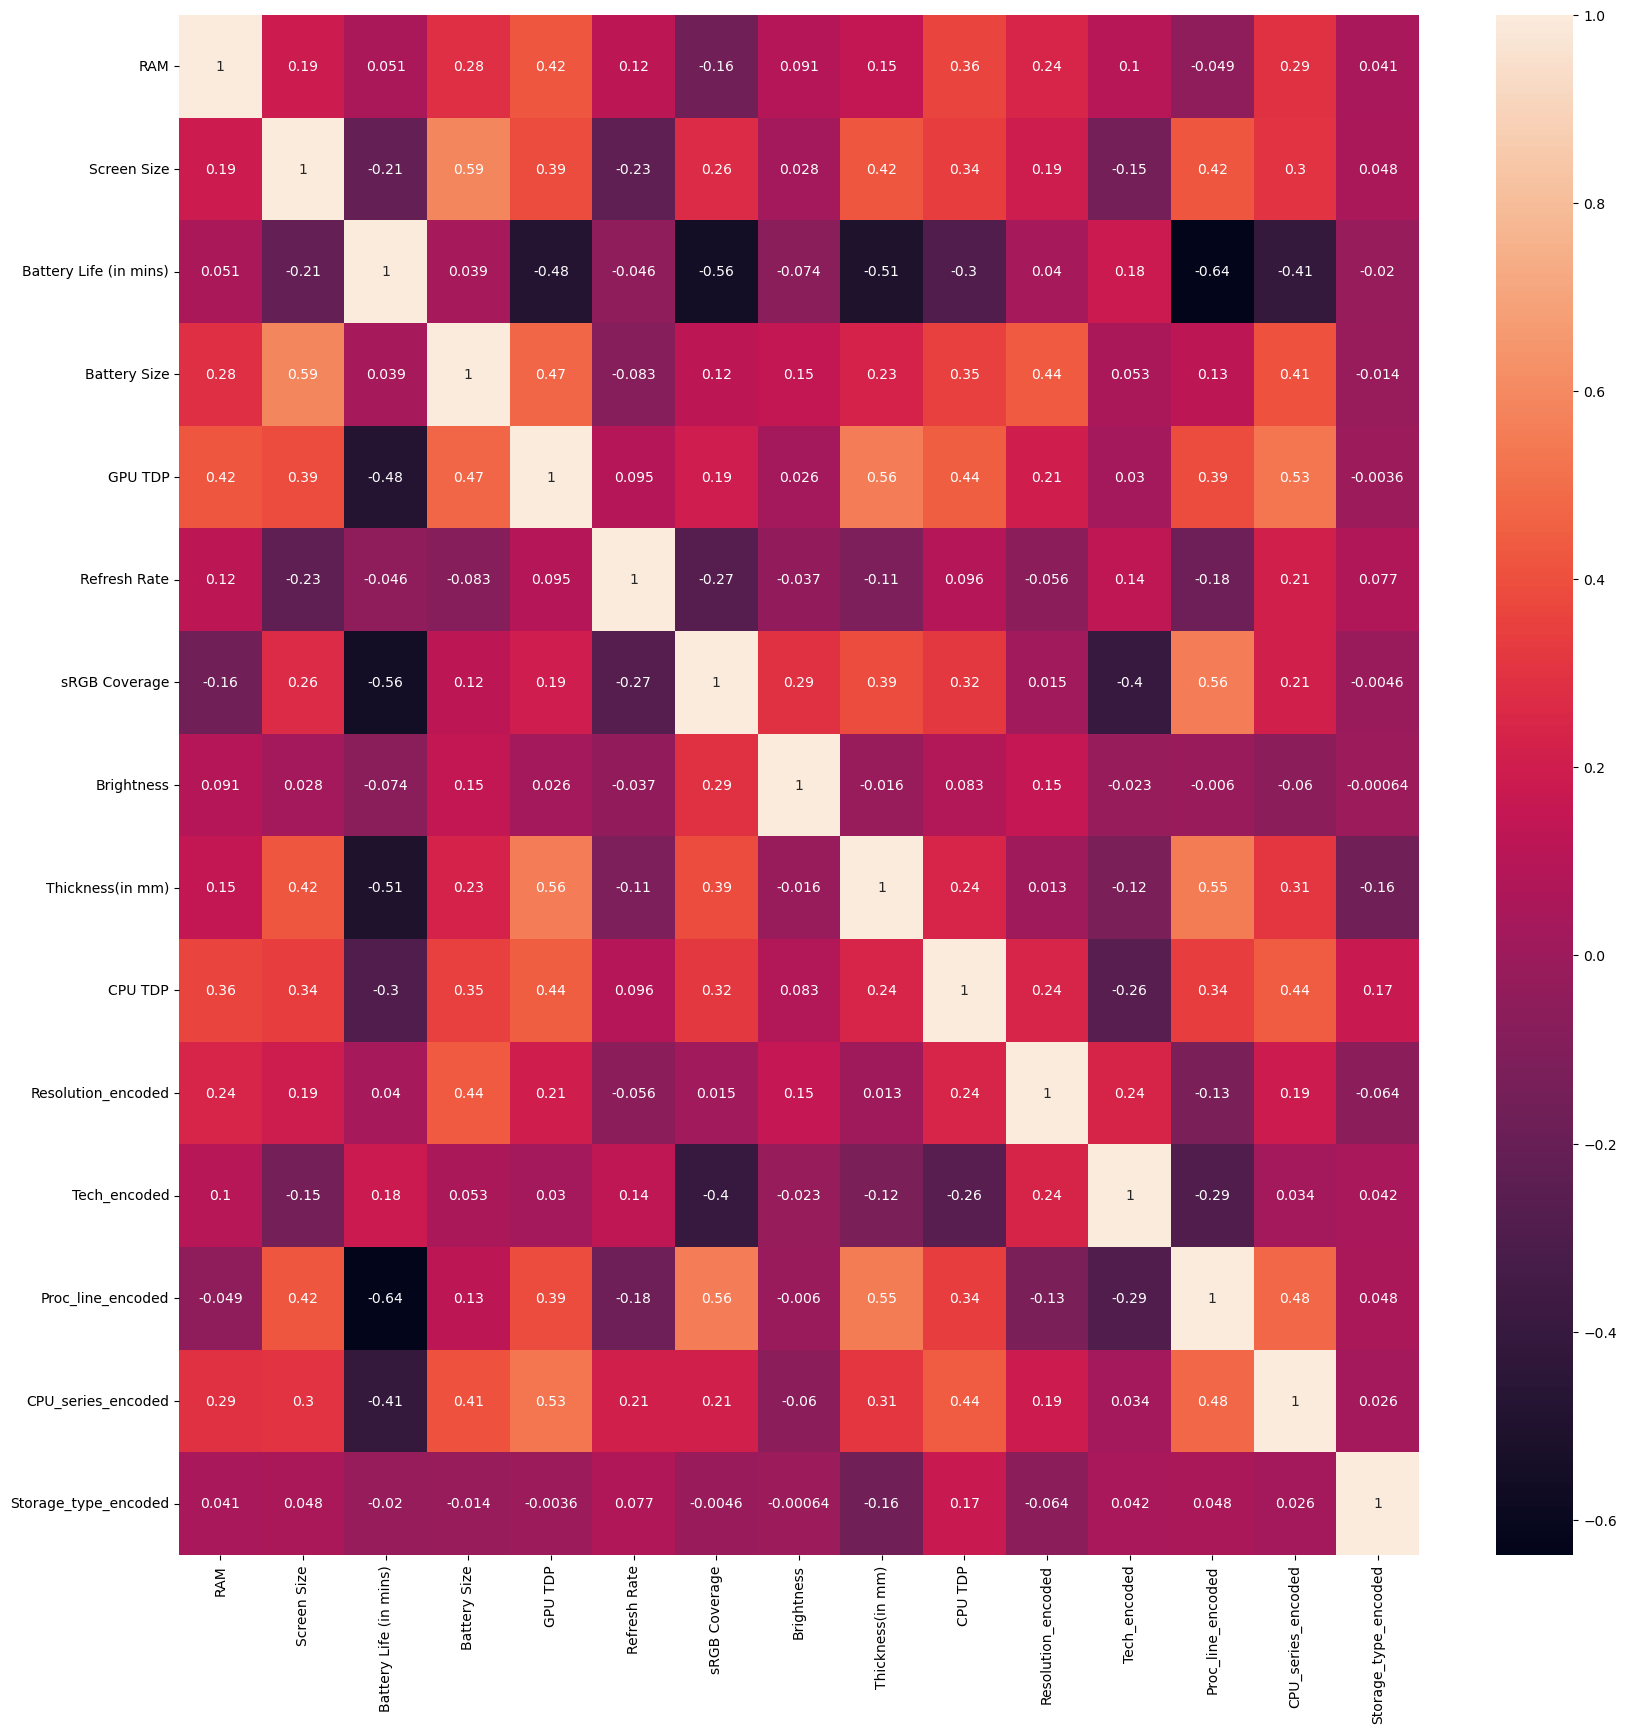

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(Creation.corr(),annot = True)

<Axes: >

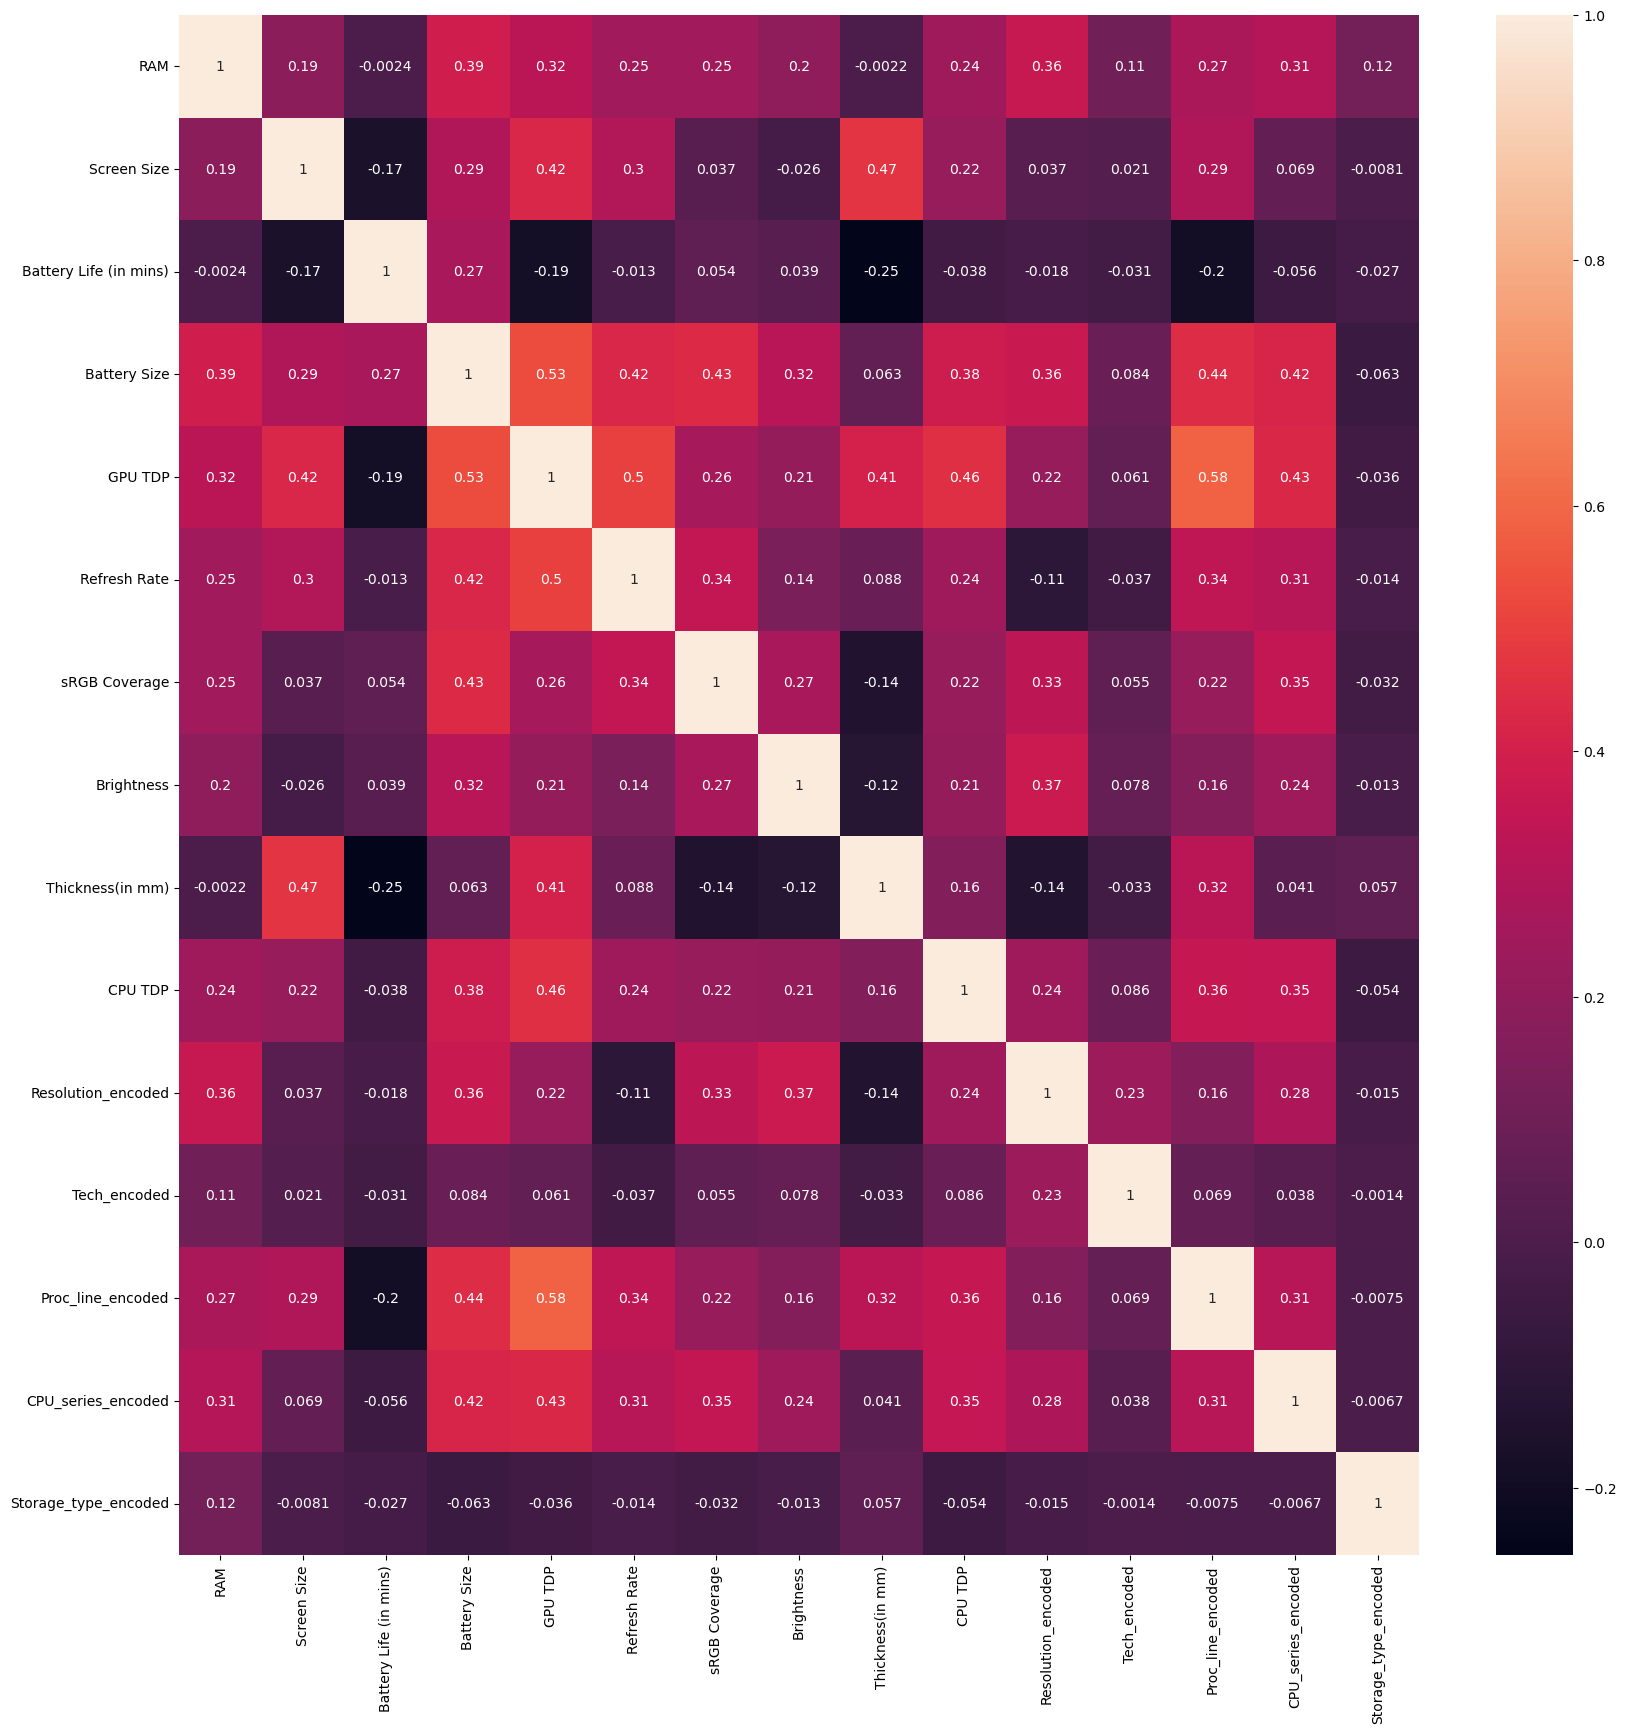

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(Gaming.corr(),annot = True)

In [101]:
Premium_Mobility = Data[(Data['Chassis/Segments'] == 'Premium Mobility_Lower') | (Data['Chassis/Segments'] == 'Premium Mobility_Upper')].copy()

In [102]:
Premium_Mobility

,Uid,Device Name,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Touch,Screen Resolution,Tech,Refresh Rate,sRGB Coverage,Brightness,CPU Brand,CPU GEN,Proc Line,GPU Brand,Chassis/Segments,Storage type,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU Series,CPU_series_encoded,Storage_type_encoded
36,4245325504630658004_4565,HP Envy x360 15z-ds100 (US),8,15.6,532,55,0,Yes,1920 x 1080,IPS,60,60,250,R5,4000,U,Vega,Premium Mobility_Lower,SSD,17,15,6,2,11,R5 4000,19,3
37,787690107996021277_5008,HP Envy 13t-ba100 (US),8,13.3,347,51,0,Yes,1920 x 1080,IPS,60,60,250,Ci5,11th Gen,U,iGFX,Premium Mobility_Lower,SSD,16,35,6,2,11,Ci5 11th Gen,34,3
38,1841130423750464825_4979,HP Envy x360 13-bd0 (US),8,13.3,347,51,0,Yes,1920 x 1080,IPS,60,90,300,Ci5,11th Gen,U,iGFX,Premium Mobility_Lower,SSD,17,35,6,2,11,Ci5 11th Gen,34,3
44,14143157959805999104_5429,HP Envy x360 15-es0 (US),8,15.6,335,51,0,Yes,1920 x 1080,IPS,60,60,250,Ci5,11th Gen,U,iGFX,Premium Mobility_Lower,SSD,18,35,6,2,11,Ci5 11th Gen,34,3
79,3984999842370831758_6299,HP Envy 17t-cr00 (US),16,17.3,392,55,0,Yes,1920 x 1080,IPS,60,100,300,Ci7,12th Gen,P,iGFX,Premium Mobility_Lower,SSD,20,28,6,2,13,Ci7 12th Gen,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,456383,Huawei MateBook D 15-53010TUY (Matebook D 15 S...,8,15.6,327,42,0,No,1920 x 1080,IPS,60,60,271,R5,3000,U,Vega,Premium Mobility_Lower,SSD,16,18,6,2,11,R5 3000,24,3
1842,454741,Lenovo Yoga C740-14IML (Yoga C740-14 Series),8,14.0,550,51,0,Yes,1920 x 1080,IPS,60,98,330,Ci5,10th Gen,U,iGFX,Premium Mobility_Lower,SSD,16,15,6,2,11,Ci5 10th Gen,20,3
1846,454113,Acer Swift 3 SF313-52-71Y7 (Swift 3 SF313 Series),16,13.5,619,54,0,No,2256 x 1504,IPS,60,99,474,Ci7,10th Gen,U,iGFX,Premium Mobility_Upper,SSD,16,15,12,2,11,Ci7 10th Gen,39,3
1849,453723,Asus ZenBook 14 UM431DA-AM020T (ZenBook 14 Ser...,8,14.0,403,47,0,No,1920 x 1080,IPS,60,92,253,R7,3000,U,Vega,Premium Mobility_Upper,SSD,16,15,6,2,11,R7 3000,32,3


<Axes: >

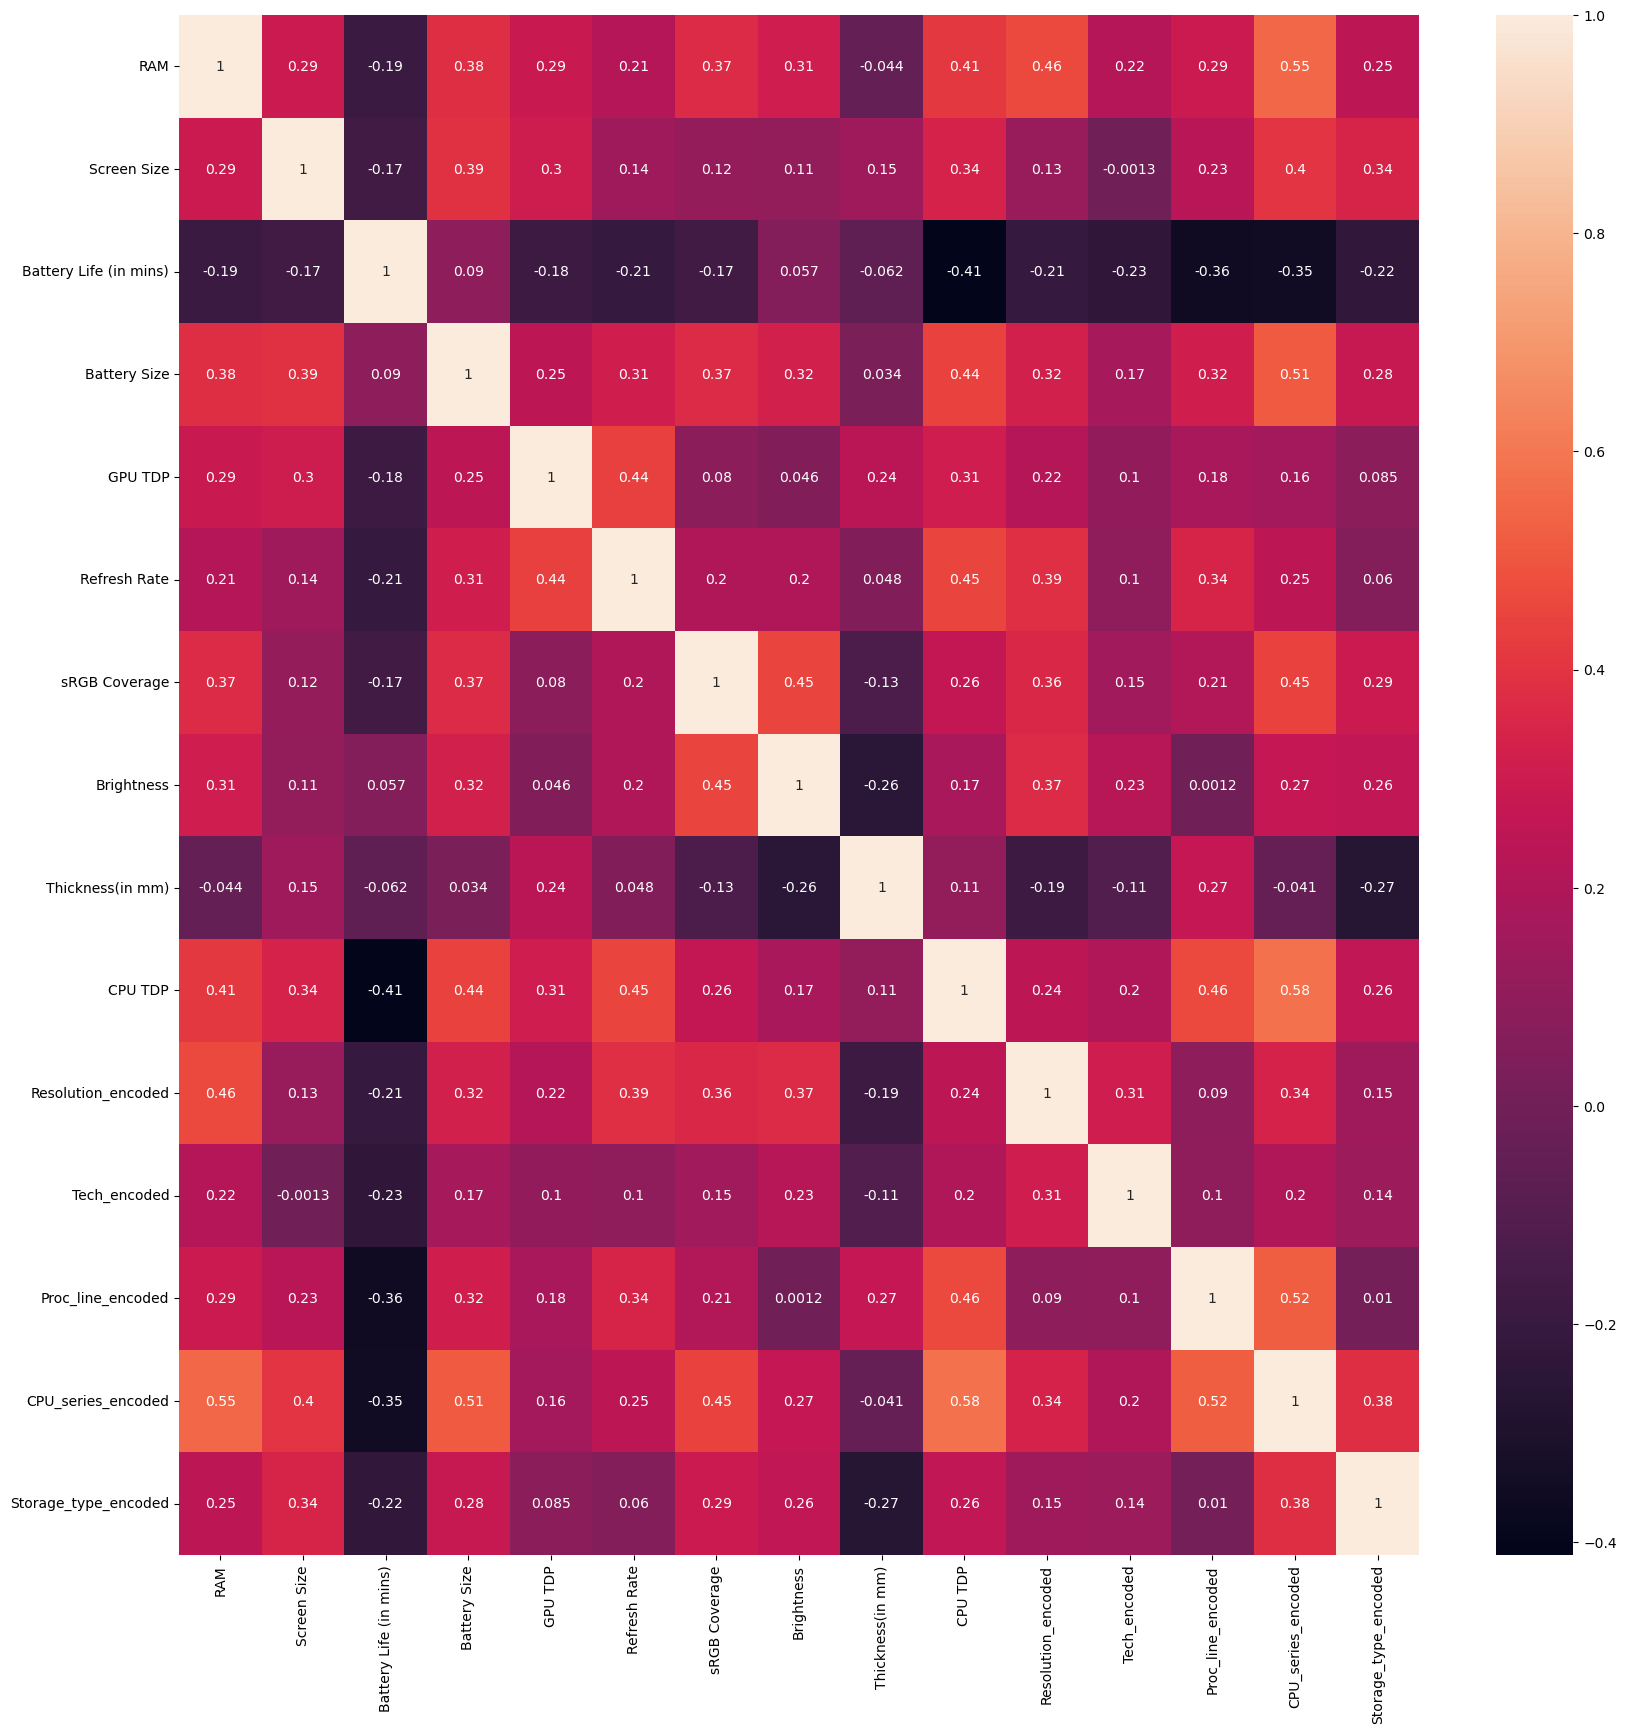

In [107]:
plt.figure(figsize=(20,20))
sns.heatmap(Premium_Mobility.corr(),annot = True)

In [114]:
X_constant = sm.add_constant(x)

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]  #We can detect multicollinearity using the variance inflation factor (VIF).
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

# All the VIF are less than 5, so there is no multicollinear columns

,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Refresh Rate,sRGB Coverage,Brightness,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU_series_encoded,Storage_type_encoded
vif,1.805702,1.513893,1.881213,2.157273,1.520155,1.782925,1.588056,1.549215,1.421354,2.140123,1.799809,1.225862,1.909031,2.72273,1.554239


In [3]:
Premium_Mobility.to_csv("Premium_mobility_final_data.csv")

NameError: name 'Premium_Mobility' is not defined

In [115]:
Premium_Mobility.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 36 to 1855
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Uid                     247 non-null    object 
 1   Device Name             247 non-null    object 
 2   RAM                     247 non-null    int64  
 3   Screen Size             247 non-null    float64
 4   Battery Life (in mins)  247 non-null    int64  
 5   Battery Size            247 non-null    int64  
 6   GPU TDP                 247 non-null    int64  
 7   Touch                   247 non-null    object 
 8   Screen Resolution       247 non-null    object 
 9   Tech                    247 non-null    object 
 10  Refresh Rate            247 non-null    int64  
 11  sRGB Coverage           247 non-null    int64  
 12  Brightness              247 non-null    int64  
 13  CPU Brand               247 non-null    object 
 14  CPU GEN                 247 non-null    

In [187]:
columns_to_drop = ['Uid','Device Name','Touch','Screen Resolution','Tech','CPU Brand','CPU GEN','Proc Line','GPU Brand','Chassis/Segments','Storage type','CPU Series']
Premium_Mobility = Premium_Mobility.drop(columns=columns_to_drop)
Premium_Mobility.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

In [4]:
Premium_Mobility_Windows = pd.read_csv("Premium_mobility_final_data_windows.csv")

In [5]:
columns_to_drop = ['Uid','Device Name','Touch','Screen Resolution','Tech','CPU Brand','CPU GEN','Proc Line','GPU Brand','Chassis/Segments','Storage type','CPU Series']
Premium_Mobility_Windows = Premium_Mobility_Windows.drop(columns=columns_to_drop)
Premium_Mobility_Windows.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

<Axes: >

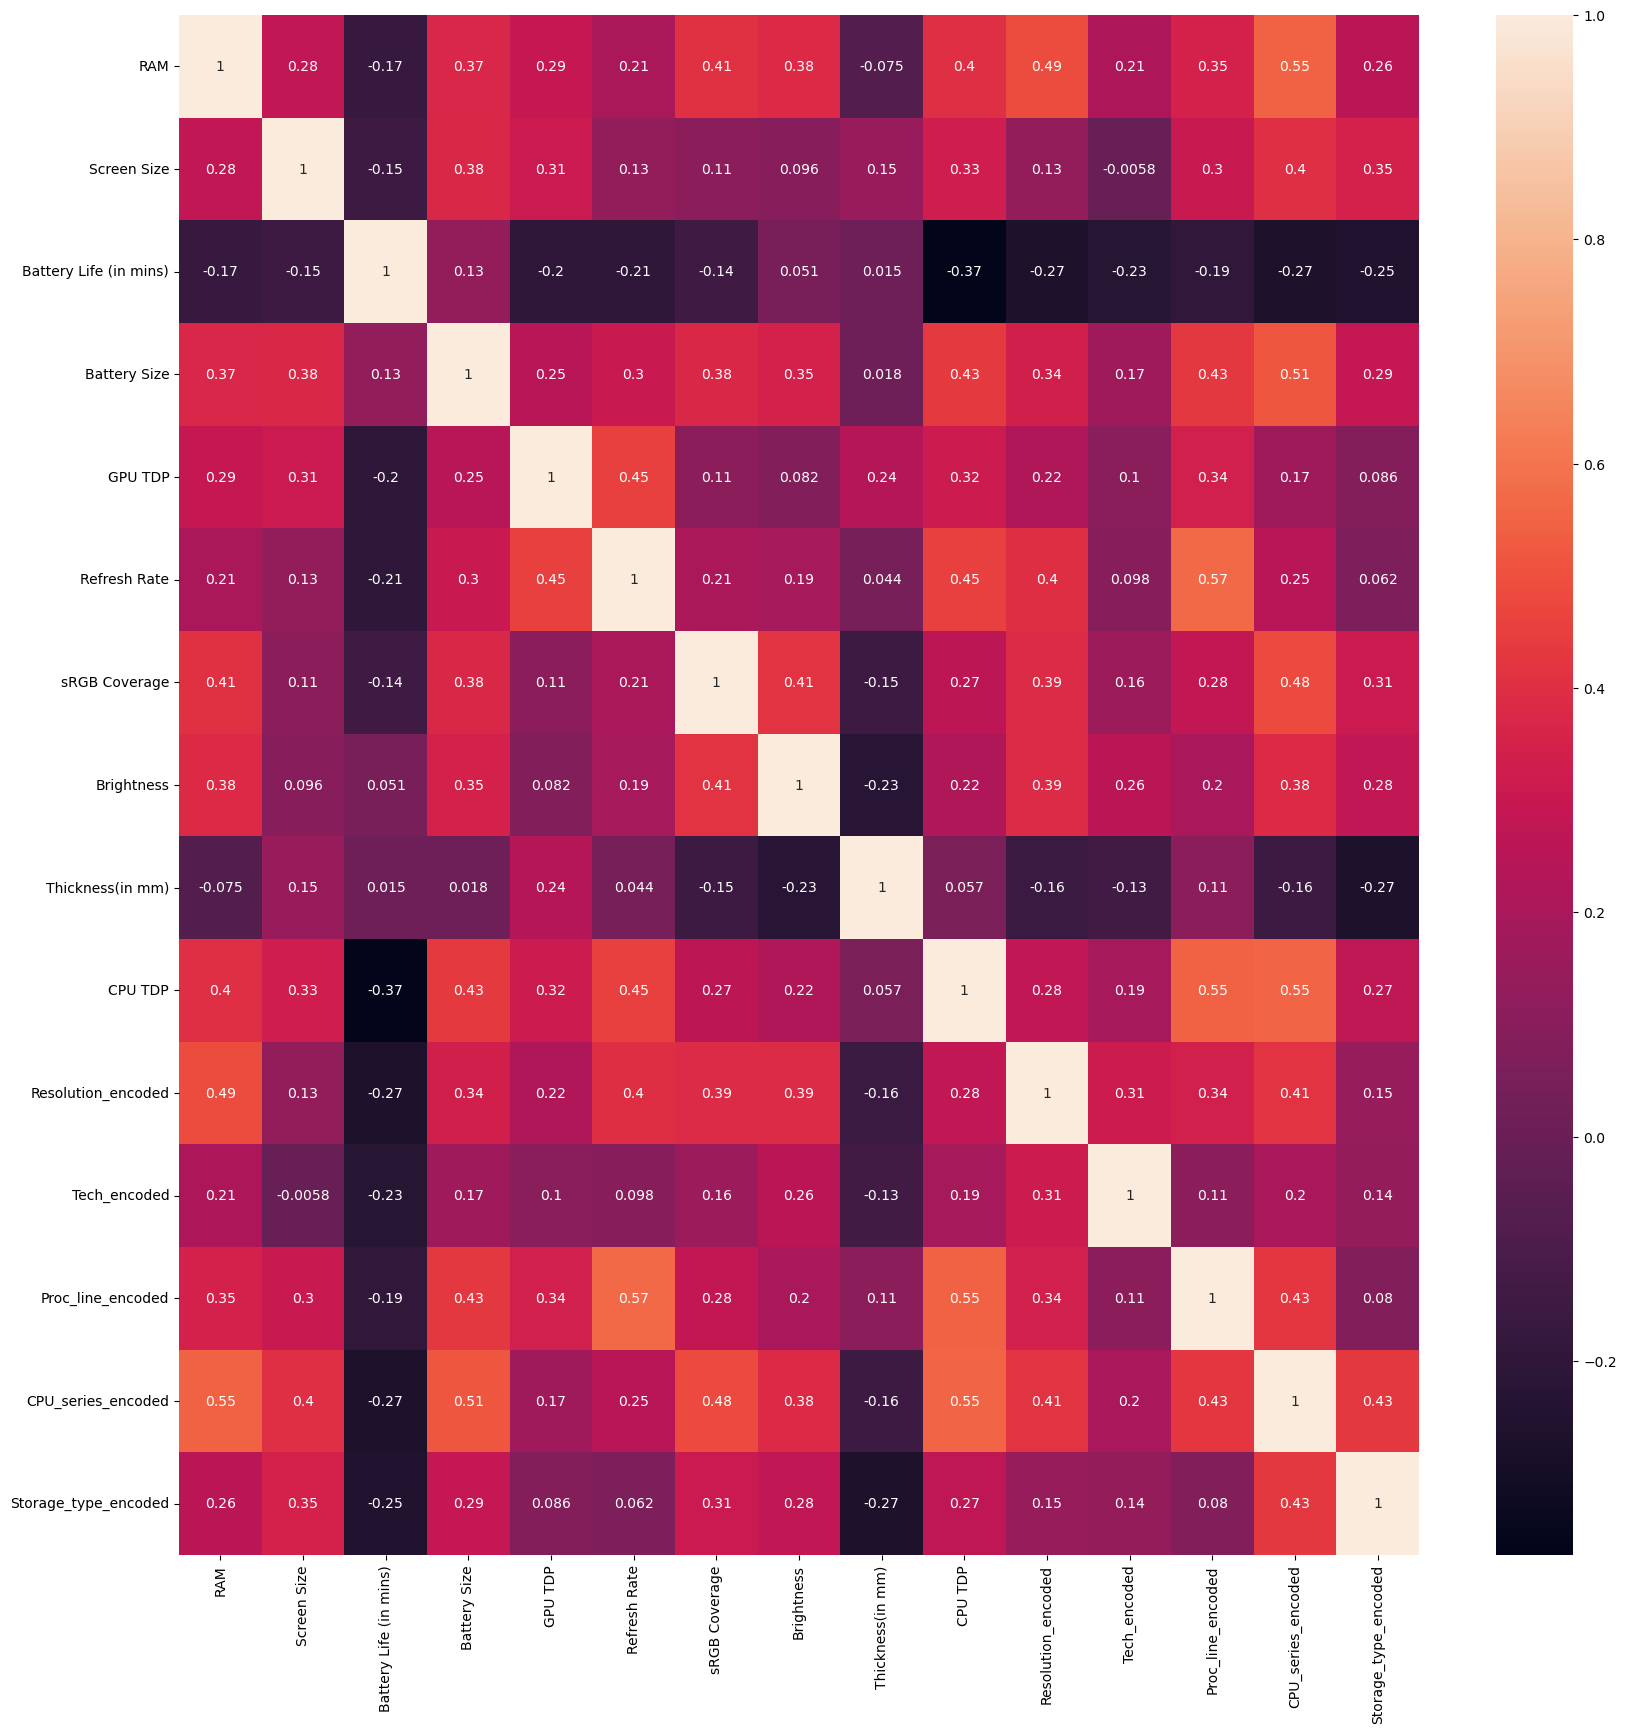

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(Premium_Mobility_Windows.corr(),annot = True)

# Model Creation - Premium Mobility

# Linear Regression

In [85]:
X = Premium_Mobility_Windows.drop('Battery Life (in mins)', axis=1)
y = Premium_Mobility_Windows['Battery Life (in mins)']

In [330]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 20)

In [331]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [332]:
LR = LinearRegression()
Linear_reg = LR.fit(X_train_scaled, y_train)

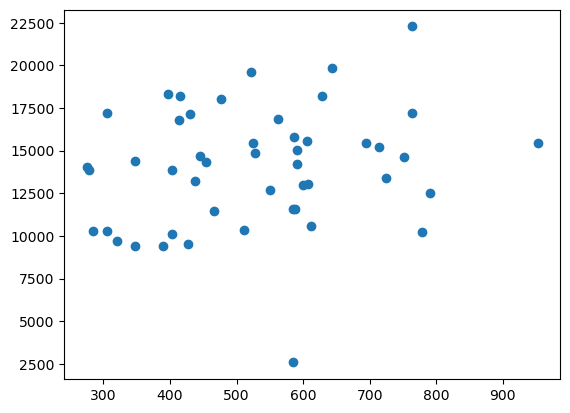

In [333]:
test_predict = LR.predict(X_test)
train_predict = LR.predict(X_train_scaled)
plt.scatter(y_test, test_predict)
plt.show()

In [334]:
MAE = metrics.mean_absolute_error(y_train, train_predict)
MSE = metrics.mean_squared_error(y_train, train_predict)
SMSE = np.sqrt(metrics.mean_squared_error(y_train, train_predict))
R2 = metrics.r2_score(y_train, train_predict)

In [329]:
print(f'Mean absolute error: {MAE}')
print(f'Mean squared error: {MSE}')
print(f'Sqrt of mean squared error: {SMSE}')
print(f'R2: {R2}')

Mean absolute error: 103.24547199926769
Mean squared error: 15329.921874616517
Sqrt of mean squared error: 123.81406169985911
R2: 0.45138227798261277


# Random Forest

In [345]:
X = Premium_Mobility_Windows.drop('Battery Life (in mins)', axis=1)
y = Premium_Mobility_Windows['Battery Life (in mins)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 11)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9642.059130324074
R-squared: 0.5859261354854863


# Gradient Boosting

In [9]:
X = Premium_Mobility_Windows.drop('Battery Life (in mins)', axis=1)
y = Premium_Mobility_Windows['Battery Life (in mins)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 11)

# Create the Gradient Boosted Regression Trees model
gbrt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Train the model
gbrt_model.fit(X_train, y_train)

# Make predictions
y_pred = gbrt_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2score)

Mean Squared Error: 6154.351947008912
R-squared: 0.7357041416323745


In [11]:
import joblib

# Save the model
joblib.dump(gbrt_model, 'gbrt_model.joblib')

# Load the model
gbrt_model = joblib.load('gbrt_model.joblib')

# Test out with different models

In [302]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Separate features and target
X = Premium_Mobility_Windows.drop('Battery Life (in mins)', axis=1)
y = Premium_Mobility_Windows['Battery Life (in mins)']

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('Support Vector Regression', SVR()),
    ('XGBoost', XGBRegressor(n_estimators=100, random_state=42)),
    ('LightGBM', LGBMRegressor(n_estimators=100, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=100, random_state=42, silent=True))
]

# Evaluate each model using cross-validation
cv_results = {}
for name, model in models:
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    mse_scores = -cv_scores
    mean_mse = np.mean(mse_scores)
    cv_results[name] = mean_mse

# Display cross-validation results
for name, mse in cv_results.items():
    print(f"{name} - Mean Squared Error (Cross-Validation): {mse:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 13
[LightGBM] [Info] Start training from score 554.873016
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Linear Regression - Mean Squared Error (Cross-Validation): 19595.26
Random Forest - Mean Squared Error (Cross-Validation): 16115.17
Gradient Boosting - Mean Squared Error (Cross-Validation): 15344.71
Support Vector Regression - Mean Squared Error (Cross-Validation): 29328.14
XGBoost - Mean Squared Error (Cross-Validation): 18564.74
LightGBM - Mean Squared Error (Cross-Validation): 16569.54
CatBoost - Mean Squared Error (Cross-Validation): 15417.99


In [346]:
pip install flask

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [347]:
pip install pickle

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pickle
import flask

In [13]:
from flask import Flask, request, jsonify

In [108]:
with open('gbrt_model.pkl', 'wb') as file:
    pickle.dump(gbrt_model, file)

# Deserialize (load) the model from the .pkl file
with open('gbrt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now, you can use loaded_model for predictions
loaded_y_pred = loaded_model.predict(X_test)

# Ensure that the loaded model gives the same predictions as the original model
assert (y_pred == loaded_y_pred).all(), "Loaded model predictions do not match original model predictions"
print("Serialization and deserialization successful!")

Serialization and deserialization successful!


In [109]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the serialized model
with open('gbrt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Make predictions using the loaded model
        predictions = loaded_model.predict(X_test)

        # Return the predictions as JSON
        return jsonify({'predictions': predictions.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='127.0.0.1', port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [19]:
pip install gunicorn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for gunicorn from https://files.pythonhosted.org/packages/0e/2a/c3a878eccb100ccddf45c50b6b8db8cf3301a6adede6e31d48e8531cab13/gunicorn-21.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/80.2 kB ? eta -:--:--
   ----------------------------------- ---- 71.7/80.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 80.2/80.2 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import subprocess
import sys

# Define the command to run Gunicorn
command = [
    sys.executable,  # Path to the Python interpreter
    '-m', 'gunicorn',
    '-w', '1',
    '-b', '127.0.0.1:5000',
    'flask_app:app'  # Replace with your actual Flask app filename and variable name
]

# Run the Gunicorn command
try:
    subprocess.Popen(command)
    print("Flask app is running.")
except Exception as e:
    print(f"Error: {e}")


Flask app is running.


In [32]:
# Assume you have a trained model saved in a variable named 'model'
import pickle

# Serialize the model
with open('gbrt_model.pkl', 'wb') as file:
    pickle.dump(gbrt_model, file)

# Deserialize the model
with open('gbrt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [89]:
import joblib

# Save the model
joblib.dump(gbrt_model, 'gbrt_model.joblib')

# Load the model
gbrt_model = joblib.load('gbrt_model.joblib')

In [110]:
# app.py
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the serialized model
with open('gbrt_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def home():
    return 'ML Model Deployment with Flask on PythonAnywhere....'

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)  

    prediction = model.predict(X_test)

    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Jan/2024 18:25:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jan/2024 18:25:25] "GET / HTTP/1.1" 200 -


In [40]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [87]:
flask.__version__

'2.2.2'

In [44]:
from platform import python_version

print(python_version())

3.11.3


In [46]:
type(X_test)

pandas.core.frame.DataFrame

In [47]:
type(pd.DataFrame())

pandas.core.frame.DataFrame

In [48]:
X_test.to_csv("Premium_Mobility_test_dataset.csv")

In [52]:
X_test = pd.read_csv("Premium_Mobility_test_dataset.csv")

In [53]:
X_test

,RAM,Screen Size,Battery Size,GPU TDP,Refresh Rate,sRGB Coverage,Brightness,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU_series_encoded,Storage_type_encoded
0,32,16.0,96,90,60,99,346,19,80,37,3,14,60,3
1,8,14.0,48,0,60,60,250,19,55,6,2,11,55,3
2,8,13.3,67,0,60,90,0,14,35,6,2,11,34,3
3,16,13.4,60,0,90,92,468,16,35,15,2,14,34,3
4,16,17.3,55,25,60,100,383,19,15,36,2,11,39,3
5,8,15.6,54,0,60,60,250,15,35,6,2,11,34,3
6,16,16.0,84,0,60,94,357,17,54,15,2,14,51,3
7,16,16.0,76,60,120,100,400,16,45,23,1,14,42,3
8,16,14.0,72,0,90,100,500,16,28,23,3,13,57,3
9,8,13.3,49,0,60,97,430,16,10,17,2,11,20,3


In [90]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the serialized model
with open('gbrt_model.joblib', 'rb') as file:
    model = joblib.load(file)

@app.route('/')
def home():
    return 'ML Model Deployment with Flask on PythonAnywhere'

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)  # Adjust this based on your model's input

    # Make predictions using the loaded model
    prediction = model.predict(X_test)

    # Return the prediction as JSON
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Jan/2024 17:17:01] "GET / HTTP/1.1" 200 -


In [97]:
import joblib
joblib.__version__

'1.2.0'

In [96]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 653.6 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.2 MB 1.4 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.2 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.2 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/9.2 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.2 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.2 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 2.8/9.2 MB 7.9 MB/s eta 0:00:01
   ------------------ ---


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [111]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/d3/96/9251b421d0a1c7d625a82a04bea56b8a9830c785940ec16db454b85c6db7/streamlit-1.29.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency info

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# app.py
import streamlit as st
import pickle  # or pickle for model loading
import numpy as np  # or any other necessary libraries

# Load the trained machine learning model
model = pickle.load('your_model.pkl')  # Update with your model file

# Streamlit app code
st.title('Your ML Model Deployment')

# Create input components (e.g., sliders, text input, etc.)
feature1 = st.slider('Feature 1', 0.0, 10.0, 5.0)
feature2 = st.slider('Feature 2', 0.0, 10.0, 5.0)

# Make predictions based on user input
input_data = np.array([[feature1, feature2]])
prediction = model.predict(input_data)

# Display the prediction
st.write('Prediction:', prediction[0])


In [112]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
pip install --upgrade joblib==1.3.2

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for joblib==1.3.2 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------- ------------------------------ 71.7/302.2 kB 1.9 MB/s eta 0:00:01
   ------------------------------------- -- 286.7/302.2 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 302.2/302.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import joblib
joblib.__version__

'1.3.2'

In [17]:
Premium_Mobility_Windows.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

# Model Creation - Gaming

In [40]:
Data = pd.read_csv("Final_Battery_Prediction_Dataset.csv")

In [41]:
Data.columns

Index(['Uid', 'OEM', 'Device Name', 'RAM', 'Screen Size', 'OS',
       'Battery Life (in mins)', 'Battery Size', 'GPU TDP', 'Touch',
       'Screen Resolution', 'Tech', 'Refresh Rate', 'sRGB Coverage',
       'Brightness', 'CPU Brand', 'CPU GEN', 'Proc Line', 'GPU Brand',
       'Chassis/Segments', 'Storage Size', 'Storage type', 'Thickness(in mm)',
       'CPU TDP', 'OS_encoded', 'Touch_encoded', 'Resolution_encoded',
       'Tech_encoded', 'Proc_line_encoded', 'CPU Series', 'GPU_brand_encoded',
       'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

In [42]:
columns_to_drop = ['Uid','OEM','Device Name','OS','Touch',
       'Screen Resolution', 'Tech','CPU Brand', 'CPU GEN', 'Proc Line', 'GPU Brand','Storage Size', 'Storage type','OS_encoded', 'Touch_encoded','CPU Series', 'GPU_brand_encoded']
Data = Data.drop(columns=columns_to_drop)
Data.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Chassis/Segments', 'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded',
       'Tech_encoded', 'Proc_line_encoded', 'CPU_series_encoded',
       'Storage_type_encoded'],
      dtype='object')

In [43]:
Gaming = Data[(Data['Chassis/Segments'] == 'Entry_Gaming') | (Data['Chassis/Segments'] == 'Gaming_Musclebook')].copy()

In [44]:
columns_to_drop = ['Chassis/Segments']
Gaming = Gaming.drop(columns=columns_to_drop)
Gaming.columns

Index(['RAM', 'Screen Size', 'Battery Life (in mins)', 'Battery Size',
       'GPU TDP', 'Refresh Rate', 'sRGB Coverage', 'Brightness',
       'Thickness(in mm)', 'CPU TDP', 'Resolution_encoded', 'Tech_encoded',
       'Proc_line_encoded', 'CPU_series_encoded', 'Storage_type_encoded'],
      dtype='object')

In [45]:
Gaming

,RAM,Screen Size,Battery Life (in mins),Battery Size,GPU TDP,Refresh Rate,sRGB Coverage,Brightness,Thickness(in mm),CPU TDP,Resolution_encoded,Tech_encoded,Proc_line_encoded,CPU_series_encoded,Storage_type_encoded
23,16,15.6,247,52,55,144,60,250,24,45,6,4,14,55,3
24,8,15.6,247,52,75,144,60,250,24,45,6,4,14,55,3
25,8,15.6,247,52,75,144,60,250,24,45,6,4,14,55,3
26,16,15.6,327,70,120,144,60,250,24,45,6,4,14,42,3
58,8,16.1,327,70,75,60,60,250,24,45,6,4,14,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1828,16,17.3,229,76,80,144,92,310,25,45,6,4,14,43,3
1832,8,15.6,505,52,80,60,61,233,23,35,6,5,14,24,3
1843,16,17.3,289,76,80,60,98,384,20,45,6,4,17,37,3
1844,16,14.0,351,52,35,60,0,567,16,15,36,4,11,39,3


In [46]:
Gaming.to_csv("Gaming_Battery_Prediction_Dataset.csv")

<Axes: >

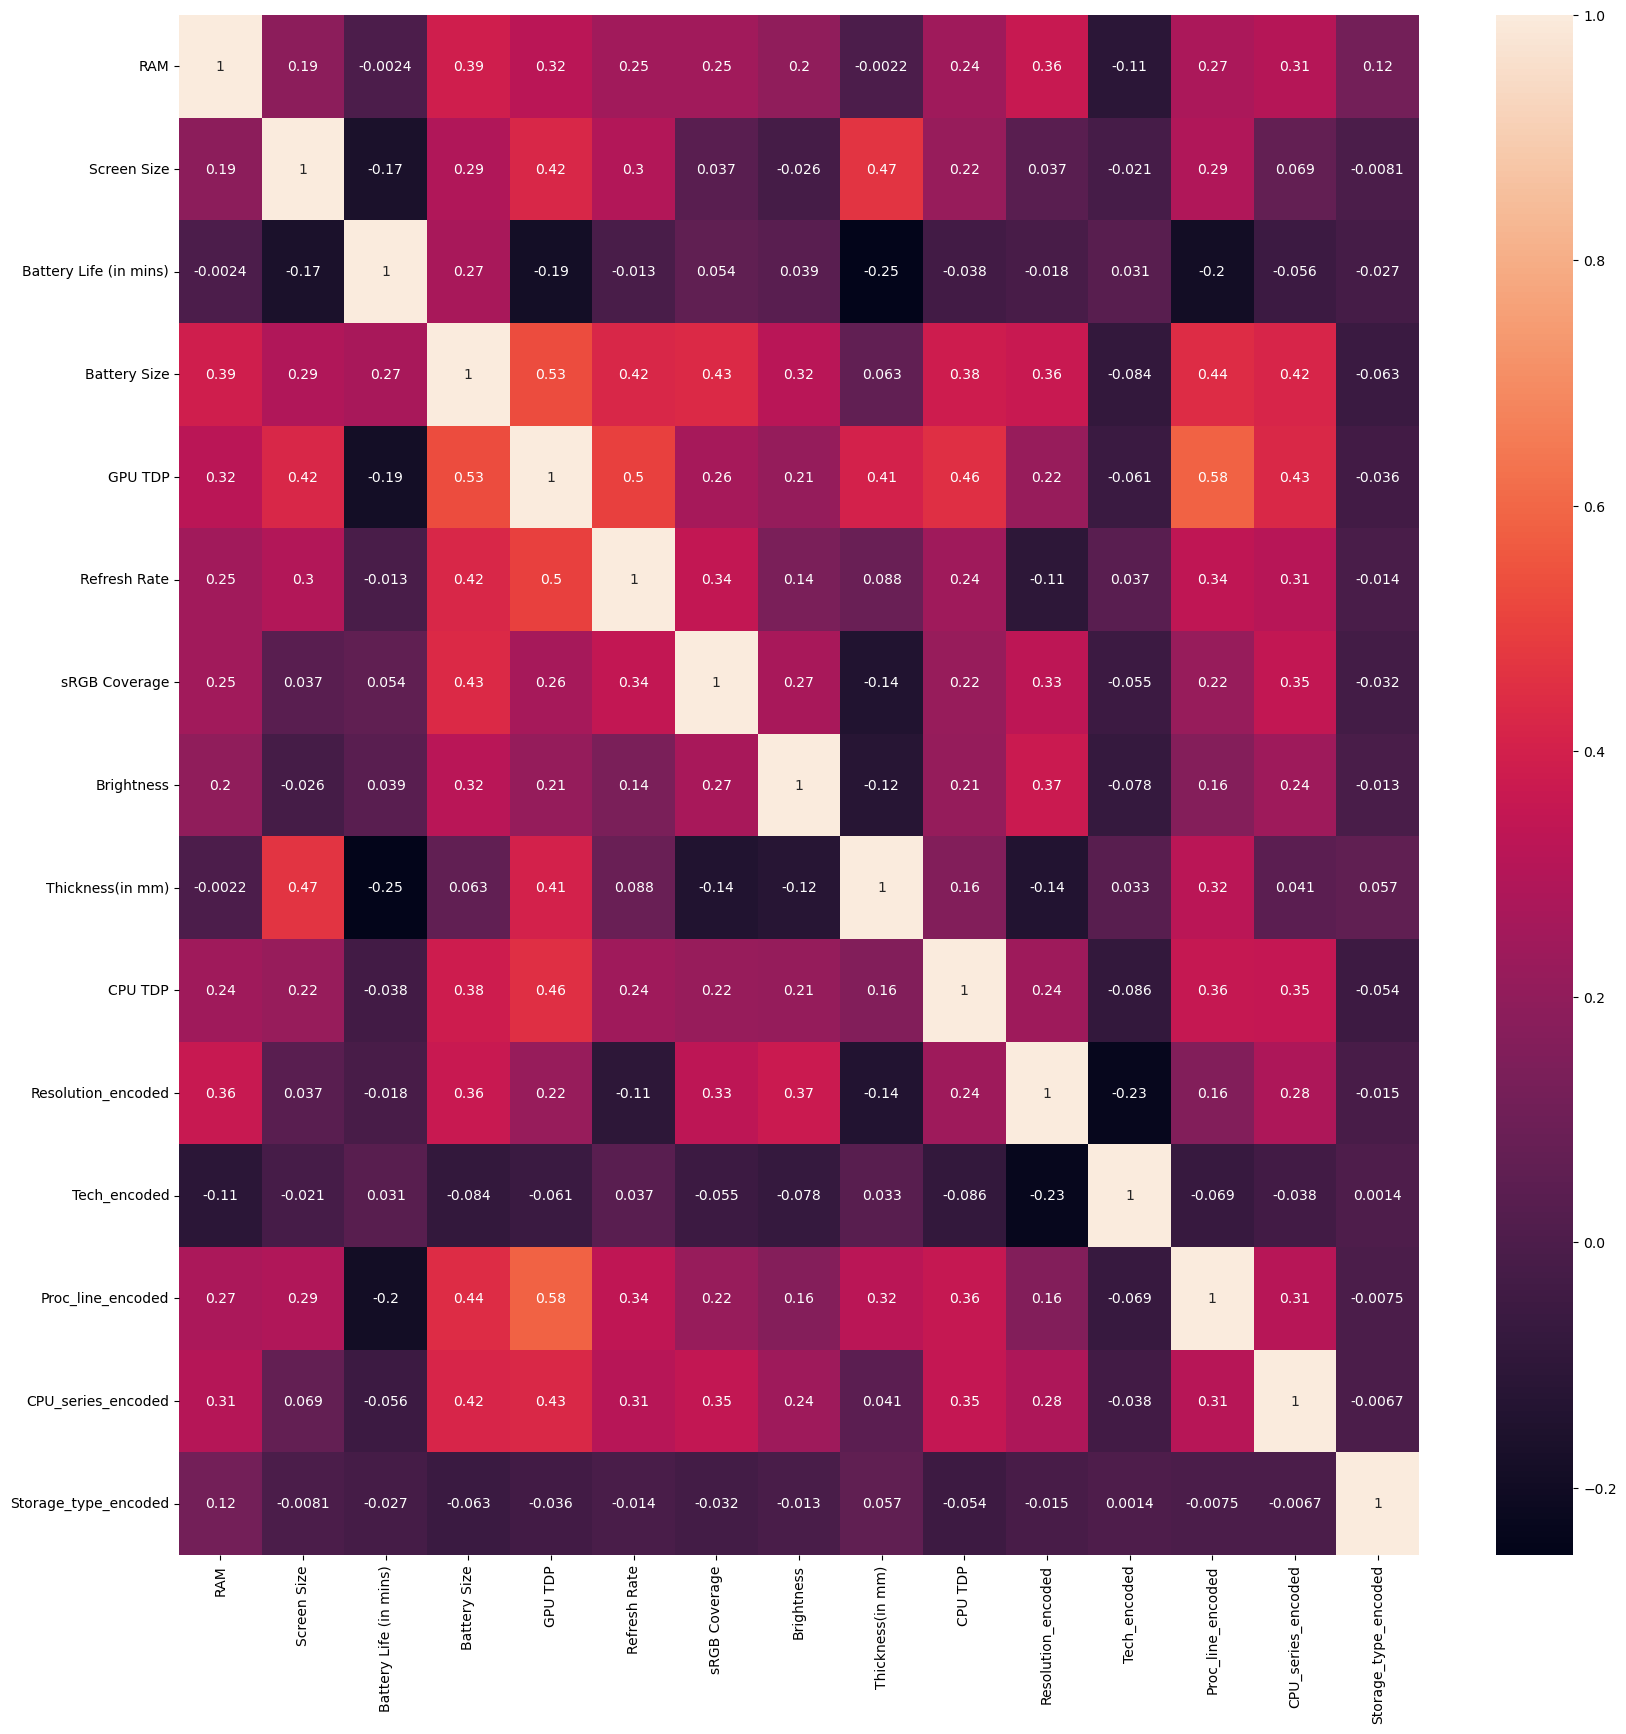

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(Gaming.corr(),annot = True)

In [50]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Function to simulate a machine learning model prediction
def predict(input_data):
    # Replace this with your actual prediction logic
    return f"Prediction for {input_data}: [Your Prediction]"

# Create interactive widgets
input_text = widgets.Text(value='Input Data', description='Input:')
output_text = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    with output_text:
        output_text.clear_output()
        result = predict(input_text.value)
        print(result)

# Create a button widget
button = widgets.Button(description='Predict')
button.on_click(on_button_click)

# Display the widgets
display(input_text)
display(button)
display(output_text)

Text(value='Input Data', description='Input:')

Button(description='Predict', style=ButtonStyle())

Output()

In [3]:
import ipywidgets as widgets
from IPython.display import display

# Function to simulate a machine learning model prediction
def predict(input_data1, input_data2, slider_value1, slider_value2):
    # Replace this with your actual prediction logic
    return f"Prediction for Input 1: {input_data1}, Input 2: {input_data2}, Slider 1: {slider_value1}, Slider 2: {slider_value2} - [Your Prediction]"

# Create interactive widgets
input_text1 = widgets.Text(value='Input Data 1', description='Input 1:')
input_text2 = widgets.Text(value='Input Data 2', description='Input 2:')
slider1 = widgets.FloatSlider(value=5, min=0, max=10, description='Slider 1:')
slider2 = widgets.FloatSlider(value=5, min=0, max=10, description='Slider 2:')
output_text = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    with output_text:
        output_text.clear_output()
        result = predict(input_text1.value, input_text2.value, slider1.value, slider2.value)
        print(result)

# Create a button widget
button = widgets.Button(description='Predict')

# Set up button visibility conditions
def update_button_visibility(change):
    button.disabled = not (input_text1.value and input_text2.value and slider1.value and slider2.value)

# Attach the function to the input widgets and sliders
input_text1.observe(update_button_visibility, names='value')
input_text2.observe(update_button_visibility, names='value')
slider1.observe(update_button_visibility, names='value')
slider2.observe(update_button_visibility, names='value')

button.on_click(on_button_click)

# Display the widgets
display(input_text1)
display(input_text2)
display(slider1)
display(slider2)
display(button)
display(output_text)


Text(value='Input Data 1', description='Input 1:')

Text(value='Input Data 2', description='Input 2:')

FloatSlider(value=5.0, description='Slider 1:', max=10.0)

FloatSlider(value=5.0, description='Slider 2:', max=10.0)

Button(description='Predict', style=ButtonStyle())

Output()

In [20]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Function to simulate a machine learning model prediction
def predict(input_data1, input_data2, slider_value1, slider_value2, dropdown1_value, dropdown2_value):
    # Replace this with your actual prediction logic
    return f"Prediction for Input 1: {input_data1}, Input 2: {input_data2}, Slider 1: {slider_value1}, Slider 2: {slider_value2}, Dropdown 1: {dropdown1_value}, Dropdown 2: {dropdown2_value} - [Your Prediction]"

# Create interactive widgets
input_text1 = widgets.Text(value='Input Data 1', description='Input 1:')
input_text2 = widgets.Text(value='Input Data 2', description='Input 2:')
slider1 = widgets.FloatSlider(value=5, min=0, max=10, description='Slider 1:')
slider2 = widgets.FloatSlider(value=5, min=0, max=10, description='Slider 2:')
dropdown1 = widgets.Dropdown(options=['Option 1', 'Option 2', 'Option 3'], value='Option 1', description='Dropdown 1:')
dropdown2 = widgets.Dropdown(options=['Option A', 'Option B', 'Option C'], value='Option A', description='Dropdown 2:')
output_text = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    if not (input_text1.value and input_text2.value and slider1.value and slider2.value and dropdown1.value and dropdown2.value):
        with output_text:
            output_text.clear_output()
            print("Please fill in all input fields before clicking Predict.")
        return
    
    with output_text:
        output_text.clear_output()
        result = predict(input_text1.value, input_text2.value, slider1.value, slider2.value, dropdown1.value, dropdown2.value)
        print(result)

# Create a button widget with initial color as grey
button = widgets.Button(description='Predict', style={'button_color': 'rgb(169,169,169)'})  # RGB for grey

# Set up button visibility conditions
def update_button_visibility(change):
    button.disabled = not (input_text1.value and input_text2.value and slider1.value and slider2.value and dropdown1.value and dropdown2.value)
    if not button.disabled:
        # Change button color to green when conditions are met
        button.style.button_color = 'rgb(0,128,0)'  # RGB for green
    else:
        # Change button color back to grey when conditions are not met
        button.style.button_color = 'rgb(169,169,169)'

# Attach the function to the input widgets, sliders, and dropdowns
input_text1.observe(update_button_visibility, names='value')
input_text2.observe(update_button_visibility, names='value')
slider1.observe(update_button_visibility, names='value')
slider2.observe(update_button_visibility, names='value')
dropdown1.observe(update_button_visibility, names='value')
dropdown2.observe(update_button_visibility, names='value')

# Add title
title_html = HTML("<h5 style='color:maroon; text-align: center; font-size:25px;'>Battery Life Prediction</h5>")
display(title_html)

button.on_click(on_button_click)

# Display the widgets
display(input_text1)
display(input_text2)
display(slider1)
display(slider2)
display(dropdown1)
display(dropdown2)
display(button)
display(output_text)  # Display the output widget

Text(value='Input Data 1', description='Input 1:')

Text(value='Input Data 2', description='Input 2:')

FloatSlider(value=5.0, description='Slider 1:', max=10.0)

FloatSlider(value=5.0, description='Slider 2:', max=10.0)

Dropdown(description='Dropdown 1:', options=('Option 1', 'Option 2', 'Option 3'), value='Option 1')

Dropdown(description='Dropdown 2:', options=('Option A', 'Option B', 'Option C'), value='Option A')

Button(description='Predict', style=ButtonStyle(button_color='rgb(169,169,169)'))

Output()